### Content
- [Import Libraries](#Import-Libraries)
- [Problem Statement](#Problem-Statement)
- [Manga Titles](#Manga-Titles)
- [Manga Details](#Manga-Details)

### Import Libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Problem Statement

You are a data scientist working in a consultancy firm who has been engaged by a client who specialises in selling manga. In order to establish their presence online, they plan to engage your consultancy firm to help setup an online store. However, the owner is skeptical about the effectiveness of a recommender system and is unwilling to include it as part of the package. As instructed by your manager, you are tasked to create a manga recommender to showcase to the client that a recommender system can improve its sales online and should be included into the package.

### Manga Titles

There are 12379 titles in the mamga_titles_cleaned.csv.

In [146]:
# Read file
manga_titles = pd.read_csv("../data_cleaned/manga_titles_cleaned.csv")

In [147]:
# Number of titles. Total 12379 titles
manga_titles.shape

(12379, 3)

In [148]:
manga_titles.head()

index                                      manga_title  \
0      0                                          Berserk   
1      1  JoJo no Kimyou na Bouken Part 7: Steel Ball Run   
2      2                                        One Piece   
3      3                                         Vagabond   
4      4                                          Monster   

                                          manga_link  
0            https://myanimelist.net/manga/2/Berserk  
1  https://myanimelist.net/manga/1706/JoJo_no_Kim...  
2         https://myanimelist.net/manga/13/One_Piece  
3         https://myanimelist.net/manga/656/Vagabond  
4            https://myanimelist.net/manga/1/Monster

In [149]:
# 85 titles with same name
temp = manga_titles['manga_title'].value_counts()
temp[temp > 1].shape

(85,)

In [150]:
# None of the titles are duplicate of each other since their links are different
manga_titles.shape[0] - manga_titles[['manga_title', 'manga_link']].drop_duplicates().shape[0]

0

### Manga Details

In [151]:
# Load manga details dataset
manga_details = pd.read_csv("../data_cleaned/manga_details_cleaned.csv")

# Remove duplicate entries when web-scraping
manga_details = manga_details.loc[manga_titles['index']]

In [152]:
# Check the shape of the dataset
# Confirm that it is same as the manga_title dataset
manga_details.shape

(12379, 88)

In [153]:
# Looking at the first 5 rows
manga_details.head()

index                                            title  volumes chapters  \
0      0                                          Berserk       41      380   
1      1  JoJo no Kimyou na Bouken Part 7: Steel Ball Run       24       96   
2      2                                        One Piece  Unknown  Unknown   
3      3                                         Vagabond       37      327   
4      4                                          Monster       18      162   

       status                       published          serialization  \
0   On Hiatus  Aug  25, 1989 to Sep  10, 2021           Young Animal   
1    Finished  Jan  19, 2004 to Apr  19, 2011             Ultra Jump   
2  Publishing              Jul  22, 1997 to ?  Shounen Jump (Weekly)   
3   On Hiatus   Sep  3, 1998 to May  21, 2015                Morning   
4    Finished   Dec  5, 1994 to Dec  20, 2001     Big Comic Original   

                                             authors published_year_start  \
0                      Miura, Kentarou (Story & Art)                 1989   
1                      Araki, Hirohiko (Story & Art)                 2004   
2                        Oda, Eiichiro (Story & Art)                 1997   
3  Inoue, Takehiko (Story & Art), Yoshikawa, Eiji...                 1998   
4                       Urasawa, Naoki (Story & Art)                 1994   

   genres_Adventure  ...  themes_Video Game  themes_Villainess  \
0               1.0  ...                0.0                0.0   
1               1.0  ...                0.0                0.0   
2               1.0  ...                0.0                0.0   
3               1.0  ...                0.0                0.0   
4               0.0  ...                0.0                0.0   

   themes_Educational  themes_Idols (Male)  demographic_Seinen  \
0                 0.0                  0.0                 1.0   
1                 0.0                  0.0                 1.0   
2                 0.0                  0.0                 0.0   
3                 0.0                  0.0                 1.0   
4                 0.0                  0.0                 1.0   

   demographic_Shounen  demographic_Not Specified  demographic_Shoujo  \
0                  0.0                        0.0                 0.0   
1                  1.0                        0.0                 0.0   
2                  1.0                        0.0                 0.0   
3                  0.0                        0.0                 0.0   
4                  0.0                        0.0                 0.0   

   demographic_Josei  demographic_Kids  
0                0.0               0.0  
1                0.0               0.0  
2                0.0               0.0  
3                0.0               0.0  
4                0.0               0.0  

[5 rows x 88 columns]

#### Publication Status
Majority (84.4%) of the mangas have completed their publication while 14.9% of the mangas are still under publication. The remaining of the titles are either discontinued or on hiatus.

In [154]:
# Number of titles classified for each status
# Majority titles have concluded
manga_details['status'].value_counts()

Finished        10453
Publishing       1853
On Hiatus          45
Discontinued       28
Name: status, dtype: int64

In [155]:
# % of titles classified for each status
# Over 80% of titles have concluded
manga_details['status'].value_counts(normalize=True)

Finished        0.844414
Publishing      0.149689
On Hiatus       0.003635
Discontinued    0.002262
Name: status, dtype: float64

#### Volumes and Chapters
##### Volumes
- 28.2% of the titles (~3,500) have only 1 volume released and only a small number of titles are able to cross the 20 volumes mark. 
- On the other hand, 16.7% of the titles did not specify the number of volumes as they are still under publishing and the number of volume is changing periodically. 
- Among those titles that were discontinued, none were more than 15 volumes.
- The max number of volumes a title has is 200

In [156]:
# Finding out the % of titles with unknown volumes
manga_details['volumes'].value_counts(normalize=True)

1          0.282818
Unknown    0.167623
2          0.118507
3          0.099523
4          0.070684
             ...   
77         0.000081
52         0.000081
65         0.000081
200        0.000081
57         0.000081
Name: volumes, Length: 67, dtype: float64

Text(0, 0.5, 'No of Titles')

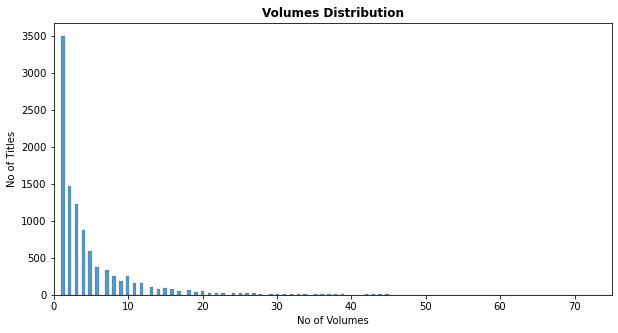

In [157]:
# Histogram of Volumes
plt.figure(figsize=(10,5))
sns.histplot(manga_details[manga_details['volumes']!='Unknown']['volumes'].astype(int))
plt.xlim(0,75)
plt.title('Volumes Distribution', fontweight='bold')
plt.xlabel('No of Volumes')
plt.ylabel('No of Titles')

In [158]:
# Highest number of volumes that 1 or more titles have is 200
manga_details[manga_details['volumes']!='Unknown']['volumes'].astype(int).max()

200

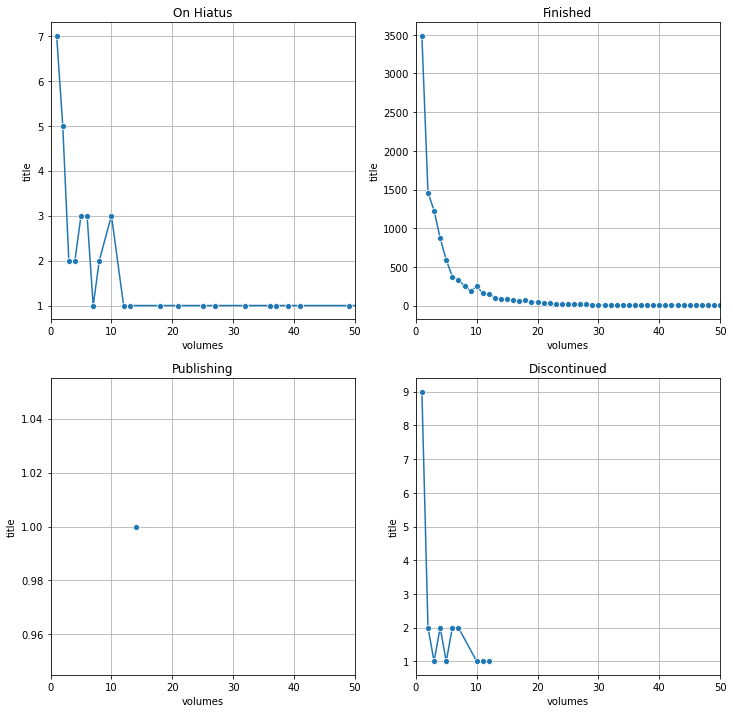

In [159]:
# Plot the number of titles vs number of volumes
fig, ax = plt.subplots(2,2, figsize=(12,12))

temp = manga_details.groupby(['volumes', 'status'])['title'].count().drop(index='Unknown').reset_index()
temp['volumes'] = temp['volumes'].astype(int)
temp.sort_values(by='volumes' ,inplace=True)

for i, status in enumerate(manga_details['status'].unique()):
    sns.lineplot(x='volumes', y='title', data=temp[temp['status']==status], ci=None, marker='o', ax=ax[int(i/2), i%2])
    ax[int(i/2), i%2].set_title(status)
    ax[int(i/2), i%2].set_xlim(0, 50)
    ax[int(i/2), i%2].grid(b=True)

In [160]:
# Majority of the unknown volumes are due to titles still publishing
manga_details[manga_details['volumes']=='Unknown']['status'].value_counts()

Publishing      1852
Finished         213
Discontinued       6
On Hiatus          4
Name: status, dtype: int64

##### Chapters
- ~19.2% of the titles have missing information on the number of chapters
    - Mainly titles which are still publishing
- ~6.6% of the titles have 5 chapters (peak of the histogram)
- Among those titles that were discontinued, majority did not exceed 50 chapters

In [161]:
# Finding out the % of titles with unknown chapters
manga_details['chapters'].value_counts(normalize=True)

Unknown    0.192261
5          0.066241
6          0.048712
4          0.046450
8          0.027951
             ...   
1957       0.000081
210        0.000081
351        0.000081
363        0.000081
286        0.000081
Name: chapters, Length: 360, dtype: float64

Text(0, 0.5, 'No of Titles')

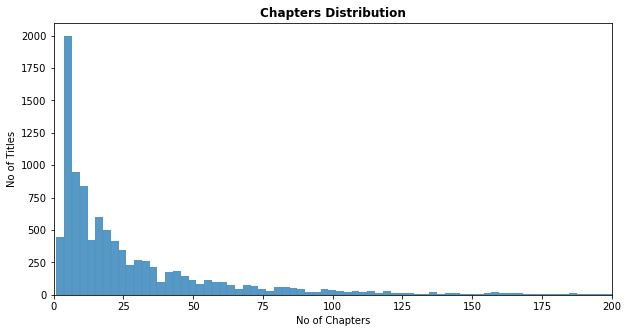

In [162]:
# Histogram of Chapters
plt.figure(figsize=(10,5))
sns.histplot(manga_details[manga_details['chapters']!='Unknown']['chapters'].astype(int))
plt.xlim(0,200)
plt.title('Chapters Distribution', fontweight='bold')
plt.xlabel('No of Chapters')
plt.ylabel('No of Titles')

In [163]:
# Highest number of chapters that 1 or more titles have is 6477
manga_details[manga_details['chapters']!='Unknown']['chapters'].astype(int).max()

6477

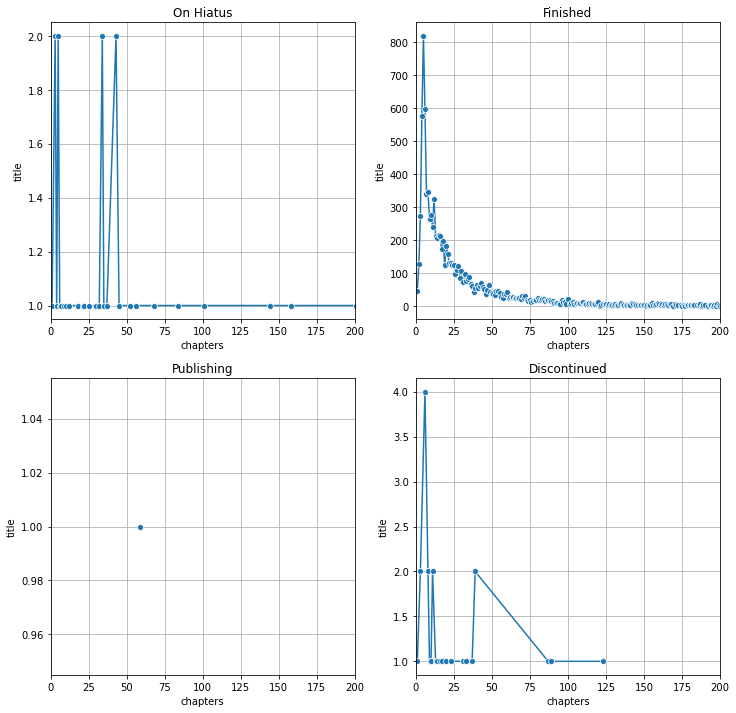

In [164]:
# Plot the number of titles vs number of chapters
fig, ax = plt.subplots(2,2, figsize=(12,12))

temp = manga_details.groupby(['chapters', 'status'])['title'].count().drop(index='Unknown').reset_index()
temp['chapters'] = temp['chapters'].astype(int)
temp.sort_values(by='chapters' ,inplace=True)

for i, status in enumerate(manga_details['status'].unique()):
    sns.lineplot(x='chapters', y='title', data=temp[temp['status']==status], ci=None, marker='o', ax=ax[int(i/2), i%2])
    ax[int(i/2), i%2].set_title(status)
    ax[int(i/2), i%2].set_xlim(0, 200)
    ax[int(i/2), i%2].grid(b=True)

In [165]:
# Majority of the unknown volumes are due to titles still publishing
manga_details[manga_details['chapters']=='Unknown']['status'].value_counts()

Publishing      1852
Finished         519
On Hiatus          8
Discontinued       1
Name: status, dtype: int64

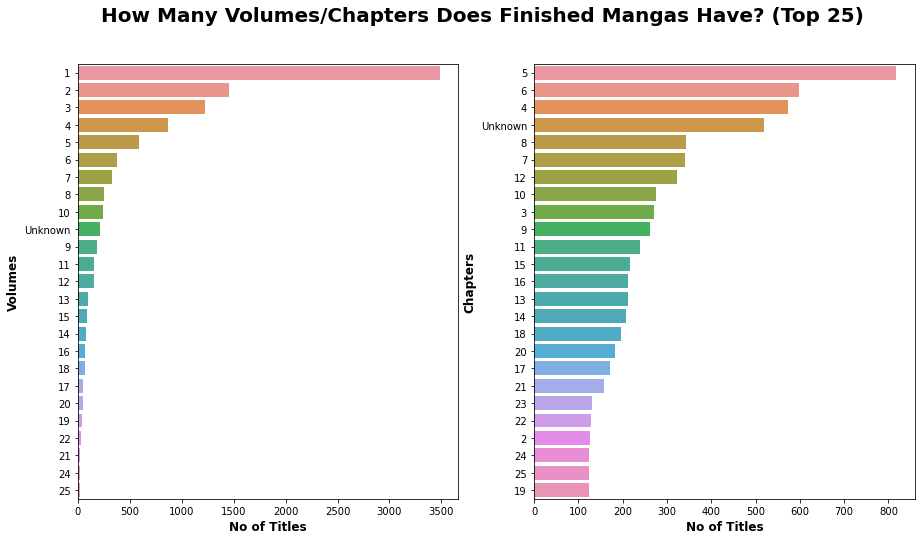

In [166]:
# How many volumes/chapter does finished titles that have?
fig, ax = plt.subplots(1, 2, figsize = (15,8))
# For volumes
temp = manga_details[manga_details['status']=='Finished']
temp = temp.groupby('volumes')['title'].count().reset_index()
temp = temp.sort_values('title', ascending=False)
# Plot bar graph for No of titles vs volumes
sns.barplot(x='title', y='volumes', data=temp.iloc[0:25], ax=ax[0])
ax[0].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[0].set_ylabel('Volumes', fontweight = 'bold', fontsize=12)

# For chapters
temp = manga_details[manga_details['status']=='Finished']
temp = temp.groupby('chapters')['title'].count().reset_index()
temp = temp.sort_values('title', ascending=False)
# Plot bar graph for No of titles vs chapters
sns.barplot(x='title', y='chapters', data=temp.iloc[0:25], ax=ax[1])
ax[1].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[1].set_ylabel('Chapters', fontweight = 'bold', fontsize=12)

# Set Overall Title
fig.suptitle("How Many Volumes/Chapters Does Finished Mangas Have? (Top 25)", fontweight = 'bold', fontsize= 20);

#### Genres, Themes and Demographic
Regardless of publishing status:-
- Romance, comedy, drama, action and fantasy are the top 5 genres
- Not specified, school, psychological, historical and harem are the top 5 themes
- Shoujo is the most common demographic

<br>

For titles that have finished publishing:-
- Romance, comedy, drama, action and fantasy are the top 5 genres
    - Romance is slightly shorter in terms of chapters/volumes as compared to other genres
- Not specified, school, psychological, historical and harem are the top 5 themes
- Shoujo remained the most common demographic
    - 58% are under genres_romance
    
<br>

For titles that are still publishing:-
- Fantasy, comedy, romance, action and adventure are the top 5 genres
    - Drama is 7th on the list
- Not specified, school, isekai, harem, reincarnation are the top 5 themes
- Not specified is the most common under demographic followed by Seinen

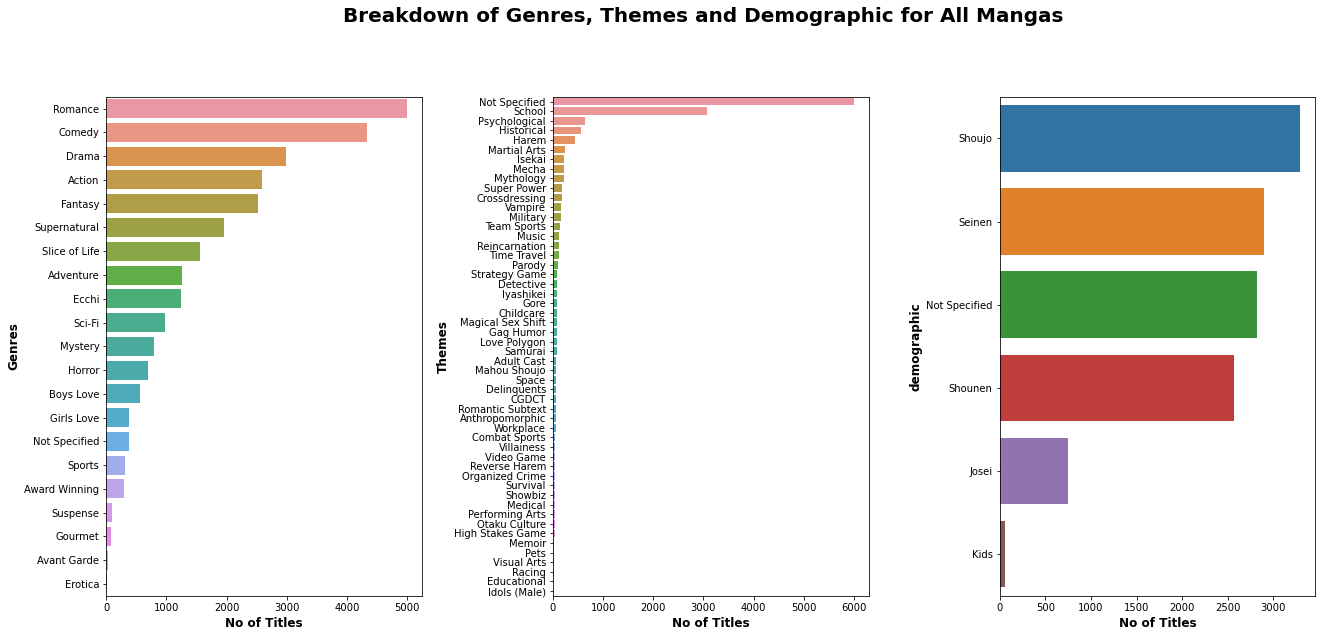

In [167]:
# Which genres, themes, demogrpahic does all titles belongs to?
fig, ax = plt.subplots(1, 3, figsize = (20,10))
plt.tight_layout(pad=10)

################################

# For genres
genres_list = [col for col in manga_details.columns if 'genres' in col]
temp = manga_details[genres_list].sum().reset_index()
temp.rename(columns={'index': 'genres', 0:'counts'}, inplace=True)
temp['genres'] = temp['genres'].apply(lambda x: x.replace('genres_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='genres', data=temp, ax=ax[0])
ax[0].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[0].set_ylabel('Genres', fontweight = 'bold', fontsize=12)

#################################

# For Themes
themes_list = [col for col in manga_details.columns if 'themes' in col]
temp = manga_details[themes_list].sum().reset_index()
temp.rename(columns={'index': 'themes', 0:'counts'}, inplace=True)
temp['themes'] = temp['themes'].apply(lambda x: x.replace('themes_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='themes', data=temp, ax=ax[1])
ax[1].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[1].set_ylabel('Themes', fontweight = 'bold', fontsize=12)

################################

# For demographic
demographic_list = [col for col in manga_details.columns if 'demographic' in col]
temp = manga_details[demographic_list].sum().reset_index()
temp.rename(columns={'index': 'demographic', 0:'counts'}, inplace=True)
temp['demographic'] = temp['demographic'].apply(lambda x: x.replace('demographic_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='demographic', data=temp, ax=ax[2])
ax[2].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[2].set_ylabel('demographic', fontweight = 'bold', fontsize=12)

##################################

# Set Overall Title
fig.suptitle("Breakdown of Genres, Themes and Demographic for All Mangas", fontweight = 'bold', fontsize= 20);

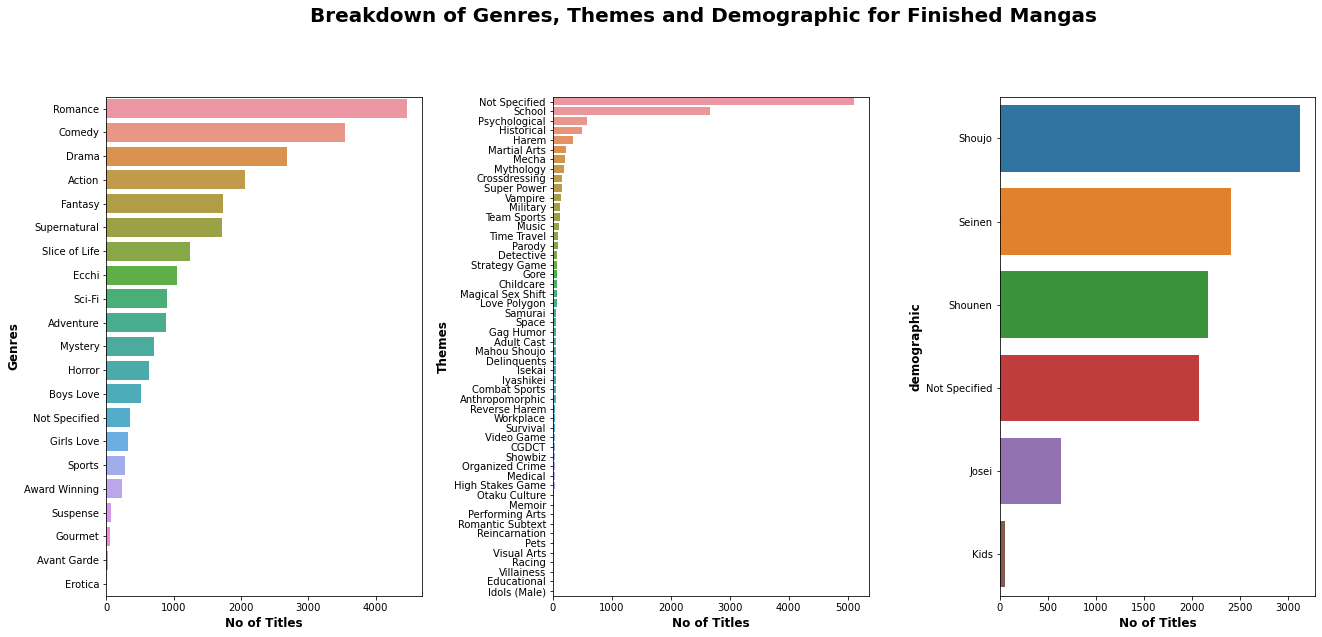

In [168]:
# Which genres, themes, demogrpahic does finished titles belongs to?
fig, ax = plt.subplots(1, 3, figsize = (20,10))
plt.tight_layout(pad=10)

################################

# For genres
genres_list = [col for col in manga_details.columns if 'genres' in col]
temp = manga_details[manga_details['status']=='Finished']
temp = temp[genres_list].sum().reset_index()
temp.rename(columns={'index': 'genres', 0:'counts'}, inplace=True)
temp['genres'] = temp['genres'].apply(lambda x: x.replace('genres_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='genres', data=temp, ax=ax[0])
ax[0].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[0].set_ylabel('Genres', fontweight = 'bold', fontsize=12)

#################################

# For Themes
themes_list = [col for col in manga_details.columns if 'themes' in col]
temp = manga_details[manga_details['status']=='Finished']
temp = temp[themes_list].sum().reset_index()
temp.rename(columns={'index': 'themes', 0:'counts'}, inplace=True)
temp['themes'] = temp['themes'].apply(lambda x: x.replace('themes_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='themes', data=temp, ax=ax[1])
ax[1].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[1].set_ylabel('Themes', fontweight = 'bold', fontsize=12)

################################

# For demographic
demographic_list = [col for col in manga_details.columns if 'demographic' in col]
temp = manga_details[manga_details['status']=='Finished']
temp = temp[demographic_list].sum().reset_index()
temp.rename(columns={'index': 'demographic', 0:'counts'}, inplace=True)
temp['demographic'] = temp['demographic'].apply(lambda x: x.replace('demographic_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='demographic', data=temp, ax=ax[2])
ax[2].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[2].set_ylabel('demographic', fontweight = 'bold', fontsize=12)

##################################

# Set Overall Title
fig.suptitle("Breakdown of Genres, Themes and Demographic for Finished Mangas", fontweight = 'bold', fontsize= 20);

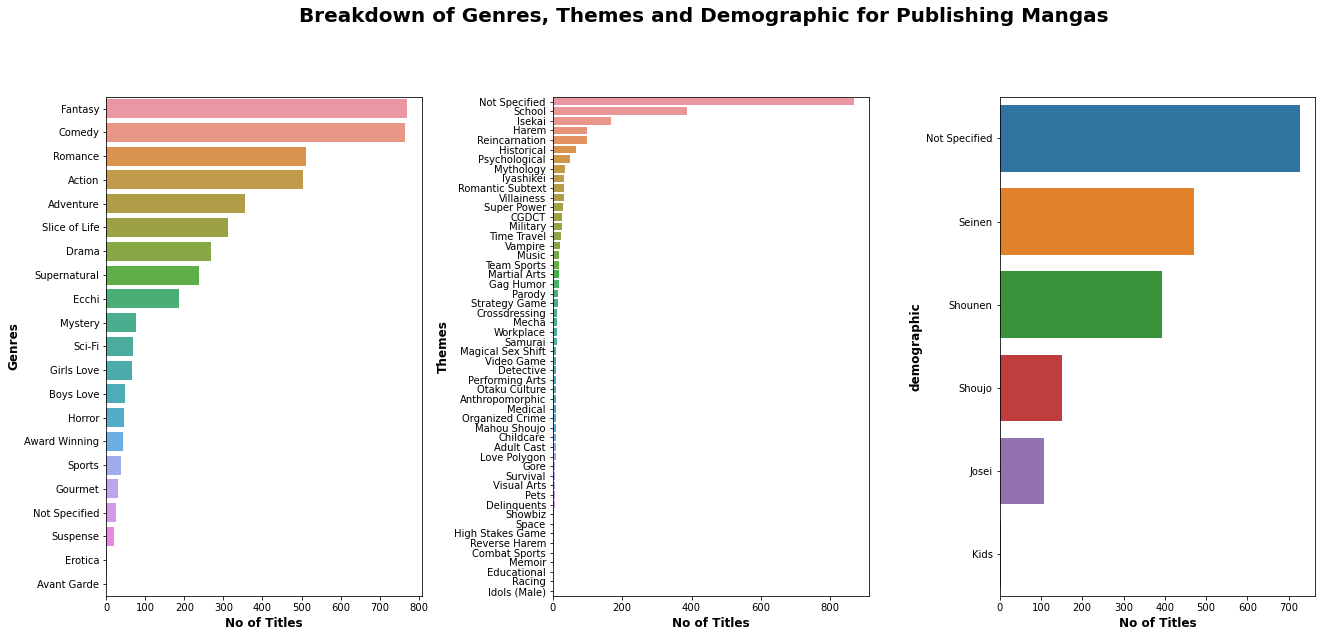

In [169]:
# Which genres, themes, demogrpahic does publishing titles belongs to?
fig, ax = plt.subplots(1, 3, figsize = (20,10))
plt.tight_layout(pad=10)

################################

# For genres
genres_list = [col for col in manga_details.columns if 'genres' in col]
temp = manga_details[manga_details['status']=='Publishing']
temp = temp[genres_list].sum().reset_index()
temp.rename(columns={'index': 'genres', 0:'counts'}, inplace=True)
temp['genres'] = temp['genres'].apply(lambda x: x.replace('genres_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='genres', data=temp, ax=ax[0])
ax[0].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[0].set_ylabel('Genres', fontweight = 'bold', fontsize=12)

#################################

# For Themes
themes_list = [col for col in manga_details.columns if 'themes' in col]
temp = manga_details[manga_details['status']=='Publishing']
temp = temp[themes_list].sum().reset_index()
temp.rename(columns={'index': 'themes', 0:'counts'}, inplace=True)
temp['themes'] = temp['themes'].apply(lambda x: x.replace('themes_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='themes', data=temp, ax=ax[1])
ax[1].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[1].set_ylabel('Themes', fontweight = 'bold', fontsize=12)

################################

# For demographic
demographic_list = [col for col in manga_details.columns if 'demographic' in col]
temp = manga_details[manga_details['status']=='Publishing']
temp = temp[demographic_list].sum().reset_index()
temp.rename(columns={'index': 'demographic', 0:'counts'}, inplace=True)
temp['demographic'] = temp['demographic'].apply(lambda x: x.replace('demographic_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='demographic', data=temp, ax=ax[2])
ax[2].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[2].set_ylabel('demographic', fontweight = 'bold', fontsize=12)

##################################

# Set Overall Title
fig.suptitle("Breakdown of Genres, Themes and Demographic for Publishing Mangas", fontweight = 'bold', fontsize= 20);

Text(0.5, 1.0, 'Finished Titles')

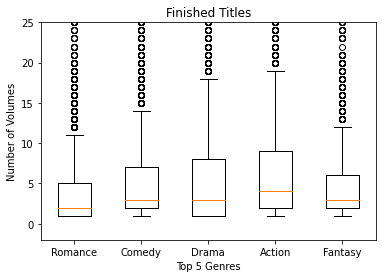

In [170]:
# Are romance the top genre for finished titles because they are shorter in general?
# Check for number of volumes
temp = [manga_details[(manga_details['status']=='Finished') & (manga_details['genres_Romance']==1) & (manga_details['volumes']!='Unknown')]['volumes'].astype(int),
       manga_details[(manga_details['status']=='Finished') & (manga_details['genres_Comedy']==1) & (manga_details['volumes']!='Unknown')]['volumes'].astype(int),
       manga_details[(manga_details['status']=='Finished') & (manga_details['genres_Drama']==1) & (manga_details['volumes']!='Unknown')]['volumes'].astype(int),
       manga_details[(manga_details['status']=='Finished') & (manga_details['genres_Action']==1) & (manga_details['volumes']!='Unknown')]['volumes'].astype(int),
       manga_details[(manga_details['status']=='Finished') & (manga_details['genres_Fantasy']==1) & (manga_details['volumes']!='Unknown')]['volumes'].astype(int)]
plt.boxplot(temp)
plt.xticks([1,2,3,4,5], ['Romance', 'Comedy', 'Drama','Action','Fantasy'])
plt.ylim(-2,25)
plt.xlabel('Top 5 Genres')
plt.ylabel('Number of Volumes')
plt.title('Finished Titles')

Text(0.5, 1.0, 'Finished Titles')

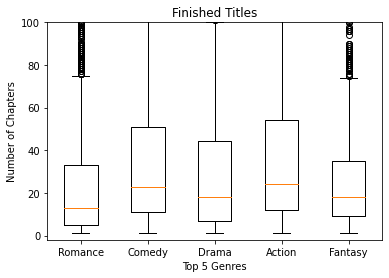

In [171]:
# Are romance the top genre because the titles are shorter in general?
# Check for number of chapters
temp = [manga_details[(manga_details['status']=='Finished') & (manga_details['genres_Romance']==1) & (manga_details['chapters']!='Unknown')]['chapters'].astype(int),
       manga_details[(manga_details['status']=='Finished') & (manga_details['genres_Comedy']==1) & (manga_details['chapters']!='Unknown')]['chapters'].astype(int),
       manga_details[(manga_details['status']=='Finished') & (manga_details['genres_Drama']==1) & (manga_details['chapters']!='Unknown')]['chapters'].astype(int),
       manga_details[(manga_details['status']=='Finished') & (manga_details['genres_Action']==1) & (manga_details['chapters']!='Unknown')]['chapters'].astype(int),
       manga_details[(manga_details['status']=='Finished') & (manga_details['genres_Fantasy']==1) & (manga_details['chapters']!='Unknown')]['chapters'].astype(int)]
plt.boxplot(temp)
plt.xticks([1,2,3,4,5], ['Romance', 'Comedy', 'Drama','Action','Fantasy'])
plt.ylim(-2,100)
plt.xlabel('Top 5 Genres')
plt.ylabel('Number of Chapters')
plt.title('Finished Titles')

In [172]:
# Checking if majority of the school themes manga are also romance manga
# 58% of the school theme mangas are romance
manga_details[(manga_details['genres_Romance']==1) & (manga_details['themes_School']==1)].shape[0]/manga_details[(manga_details['themes_School']==1)].shape[0]

0.5801825293350718

In [173]:
# Checking if majority of the romance themes manga are also school theme
# Only 35.6% of the romance manga are school theme
manga_details[(manga_details['genres_Romance']==1) & (manga_details['themes_School']==1)].shape[0]/manga_details[(manga_details['genres_Romance']==1)].shape[0]

0.3561424569827931

#### Number of New Titles Across the Year
- Number of titles increased exponentially from 1946 to 2008 before reaching the peak around 2008 to 2014.
    - Number by the decade showed that 2010s has the most number of titles, followed by 2000s
- Number of titles dropped significantly during 2021 by more than 50% from 2020
- More than 50% of the titles which started publishing since 2019 are still publishing in 2022
- Romance mangas spiked during the mid-2000s
- Comedy manga is 2nd highest in terms of number of titles published and is relatively constant from 2010 to 2020
- School theme manga increased significantly from 2000 to 2020
- There is a decent correlation (~0.59) between themes_Isekai and themes_Reincarnation
    - Isekai and reincarnation are frequently tied together in modern mangas

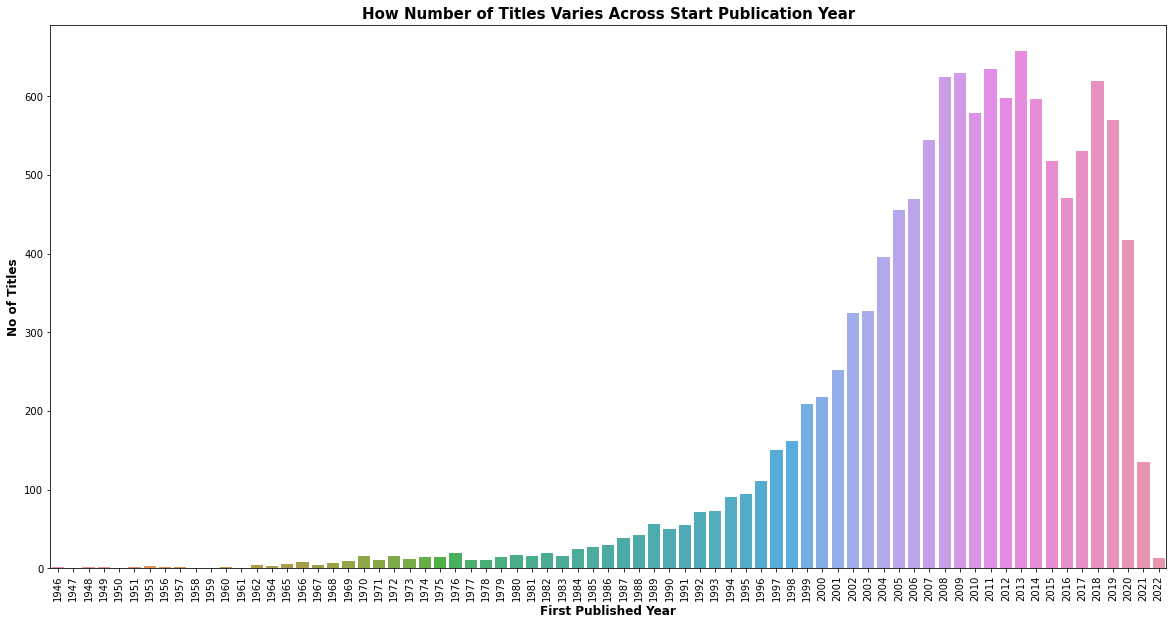

In [174]:
# Plot the number of titles by each publication year
temp = manga_details.drop(index=manga_details[manga_details['published_year_start']=='Not available'].index).groupby(['published_year_start'])['title'].count().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x='published_year_start',y='title', data=temp, ci=None)
plt.xticks(rotation=90)
plt.xlabel("First Published Year", fontweight='bold', fontsize=12)
plt.ylabel("No of Titles", fontweight='bold', fontsize=12)
plt.title("How Number of Titles Varies Across Start Publication Year", fontweight='bold', fontsize=15);

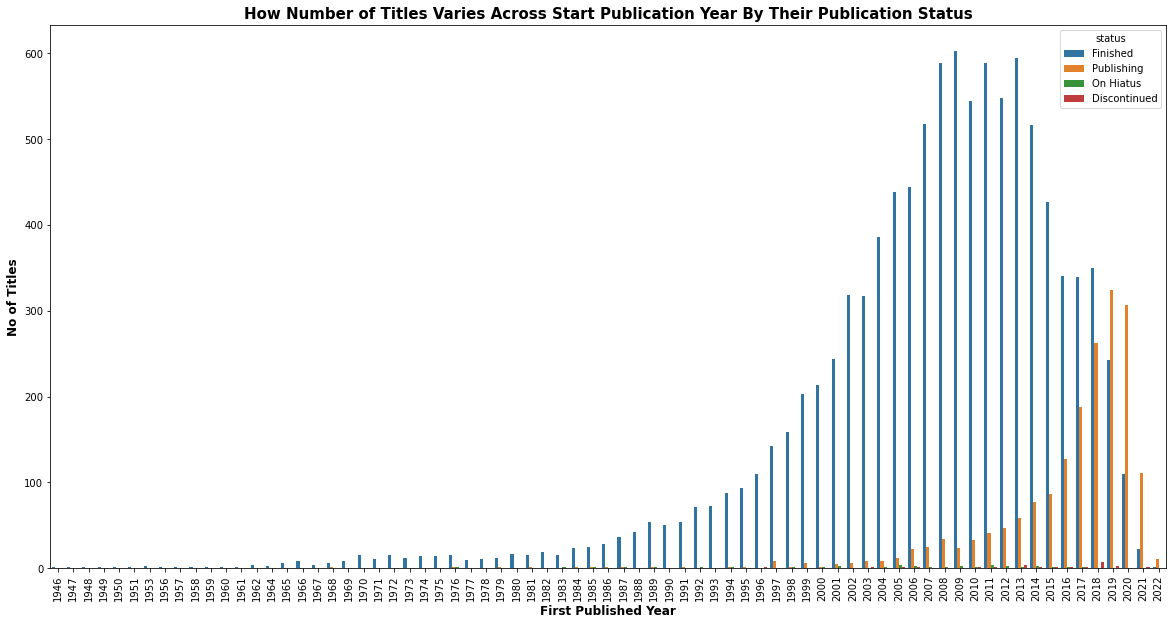

In [175]:
# Plot the number of titles by each publication year by their status
temp = manga_details.drop(index=manga_details[manga_details['published_year_start']=='Not available'].index).groupby(['published_year_start', 'status'])['title'].count().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x='published_year_start',y='title', data=temp, hue='status')
plt.xticks(rotation=90)
plt.xlabel("First Published Year", fontweight='bold', fontsize=12)
plt.ylabel("No of Titles", fontweight='bold', fontsize=12)
plt.title("How Number of Titles Varies Across Start Publication Year By Their Publication Status", fontweight='bold', fontsize=15);

Text(0.5, 0, 'Year (Decade)')

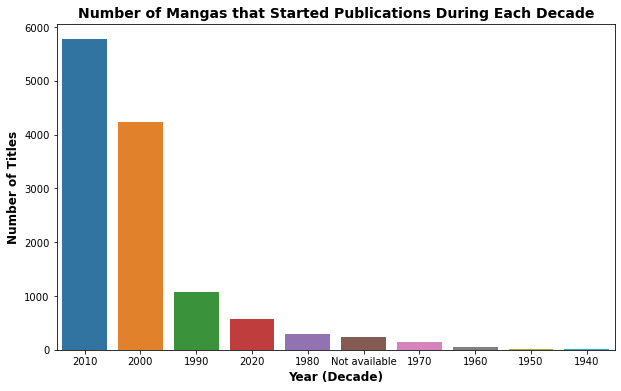

In [176]:
# Check how many mangas started publication by each decade
manga_details['published_decade_start'] = manga_details['published_year_start'].apply(lambda x: int(int(x)/10)*10 if x != "Not available" else "Not available")
temp = manga_details.groupby('published_decade_start')[['title']].count().sort_values('title', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(y=temp['title'], x=temp.index)
plt.title("Number of Mangas that Started Publications During Each Decade", fontweight='bold', fontsize = 14)
plt.ylabel("Number of Titles", fontweight='bold', fontsize = 12)
plt.xlabel("Year (Decade)", fontweight='bold', fontsize = 12)

Text(0, 0.5, 'Year)')

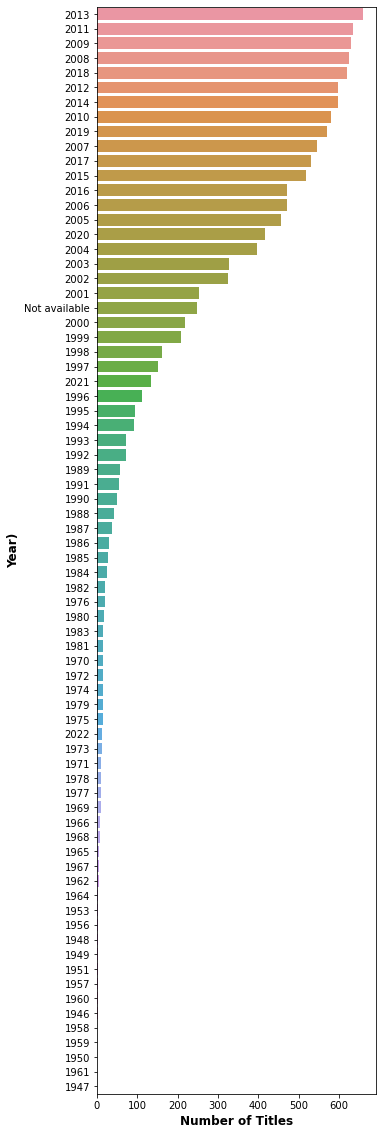

In [177]:
# Check how many mangas started publication each year sorted by year
temp = manga_details.groupby('published_year_start')[['title']].count().sort_values('title', ascending=False)
plt.figure(figsize=(5,20))
sns.barplot(x=temp['title'], y=temp.index)
plt.xlabel("Number of Titles", fontweight='bold', fontsize = 12)
plt.ylabel("Year)", fontweight='bold', fontsize = 12)

In [178]:
# Create a list to better narrow down the table when comparing
genres_features = [col for col in manga_details.columns if 'genres' in col]
themes_features = [col for col in manga_details.columns if 'themes' in col]
demographic_features = [col for col in manga_details.columns if 'demographic' in col]

<AxesSubplot:xlabel='published_year_start'>

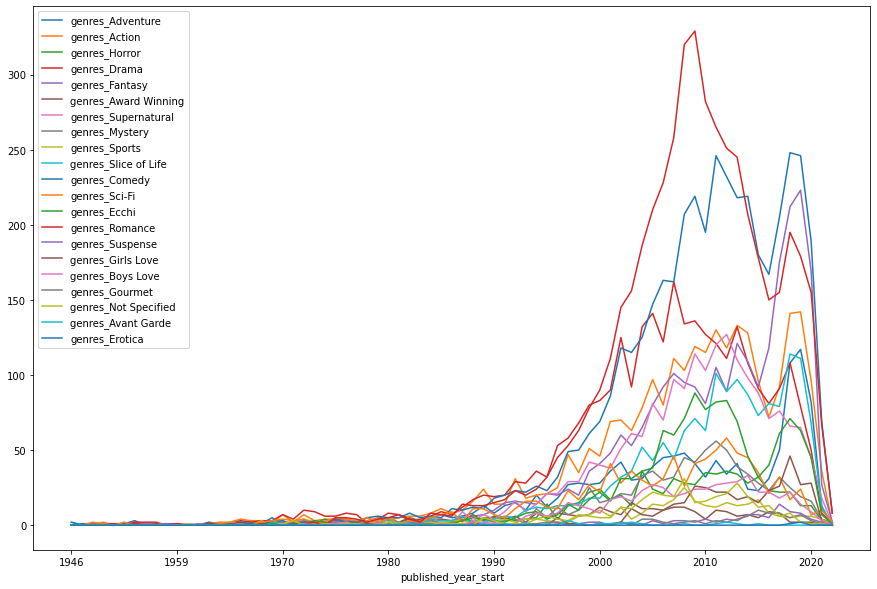

In [179]:
# Count number of titles by respective columns
temp = manga_details.groupby(['published_year_start']).agg('sum').drop(index = 'Not available')
# No of Titles By Genre Group by Decade
temp[genres_features].plot(figsize=(15,10))
# sns.lineplot(x=range(0,10,1), y='genres_Adventure', data=temp)

In [180]:
temp[genres_features].sum().sort_values(ascending=False)

genres_Romance          4848.0
genres_Comedy           4273.0
genres_Drama            2925.0
genres_Action           2570.0
genres_Fantasy          2505.0
genres_Supernatural     1944.0
genres_Slice of Life    1559.0
genres_Adventure        1253.0
genres_Ecchi            1235.0
genres_Sci-Fi            968.0
genres_Mystery           792.0
genres_Horror            679.0
genres_Boys Love         534.0
genres_Girls Love        381.0
genres_Not Specified     359.0
genres_Sports            313.0
genres_Award Winning     287.0
genres_Suspense           96.0
genres_Gourmet            86.0
genres_Avant Garde        22.0
genres_Erotica             3.0
dtype: float64

<AxesSubplot:>

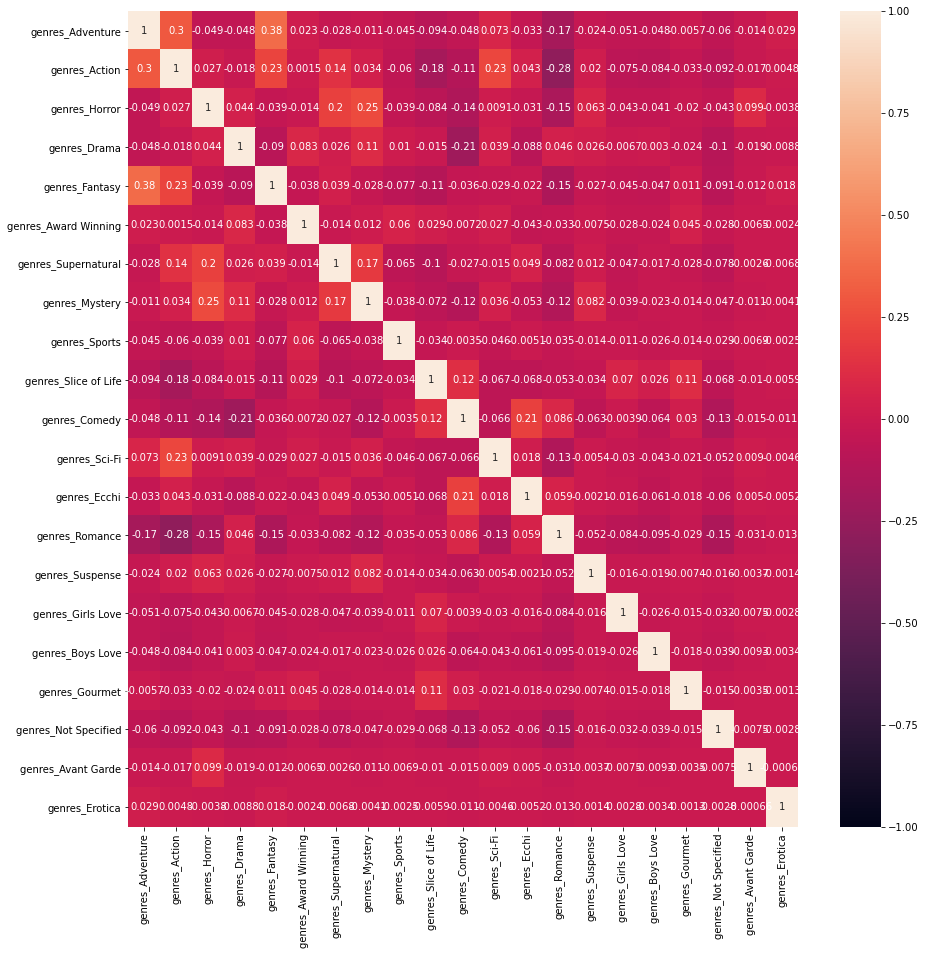

In [181]:
# Checking the correlation between the genres
# No noteworthy pairing since all pairing magnitude are less than 0.7
plt.figure(figsize=(15,15))
sns.heatmap(manga_details[genres_features].corr(), vmax=1, vmin=-1, annot=True)

<AxesSubplot:xlabel='published_year_start'>

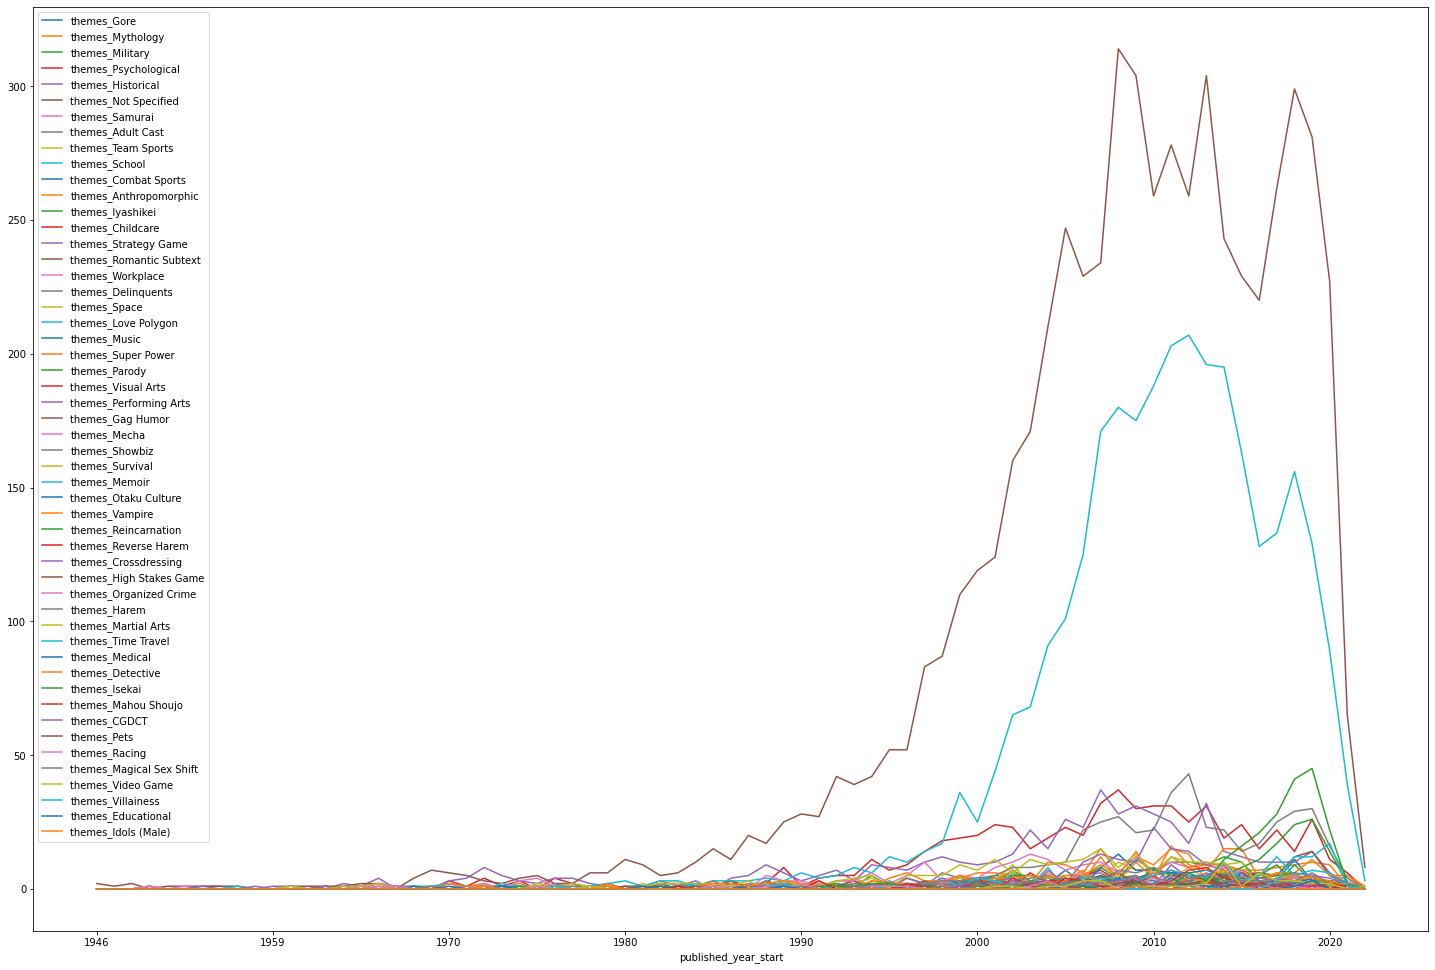

In [182]:
# No of Titles By theme Group by Published Year
# There is an significant increase in school themes mangas from 2000 to 2020
temp[themes_features].plot(figsize=(25,17))

In [183]:
temp[themes_features].sum().sort_values(ascending=False)

themes_Not Specified        5807.0
themes_School               3032.0
themes_Psychological         636.0
themes_Historical            549.0
themes_Harem                 438.0
themes_Martial Arts          237.0
themes_Isekai                218.0
themes_Mythology             217.0
themes_Mecha                 215.0
themes_Super Power           187.0
themes_Crossdressing         173.0
themes_Military              153.0
themes_Vampire               153.0
themes_Team Sports           128.0
themes_Music                 122.0
themes_Reincarnation         120.0
themes_Time Travel           109.0
themes_Parody                 90.0
themes_Strategy Game          86.0
themes_Detective              83.0
themes_Iyashikei              81.0
themes_Gore                   75.0
themes_Childcare              75.0
themes_Magical Sex Shift      73.0
themes_Gag Humor              72.0
themes_Samurai                70.0
themes_Love Polygon           70.0
themes_Adult Cast             65.0
themes_Mahou Shoujo 

<AxesSubplot:>

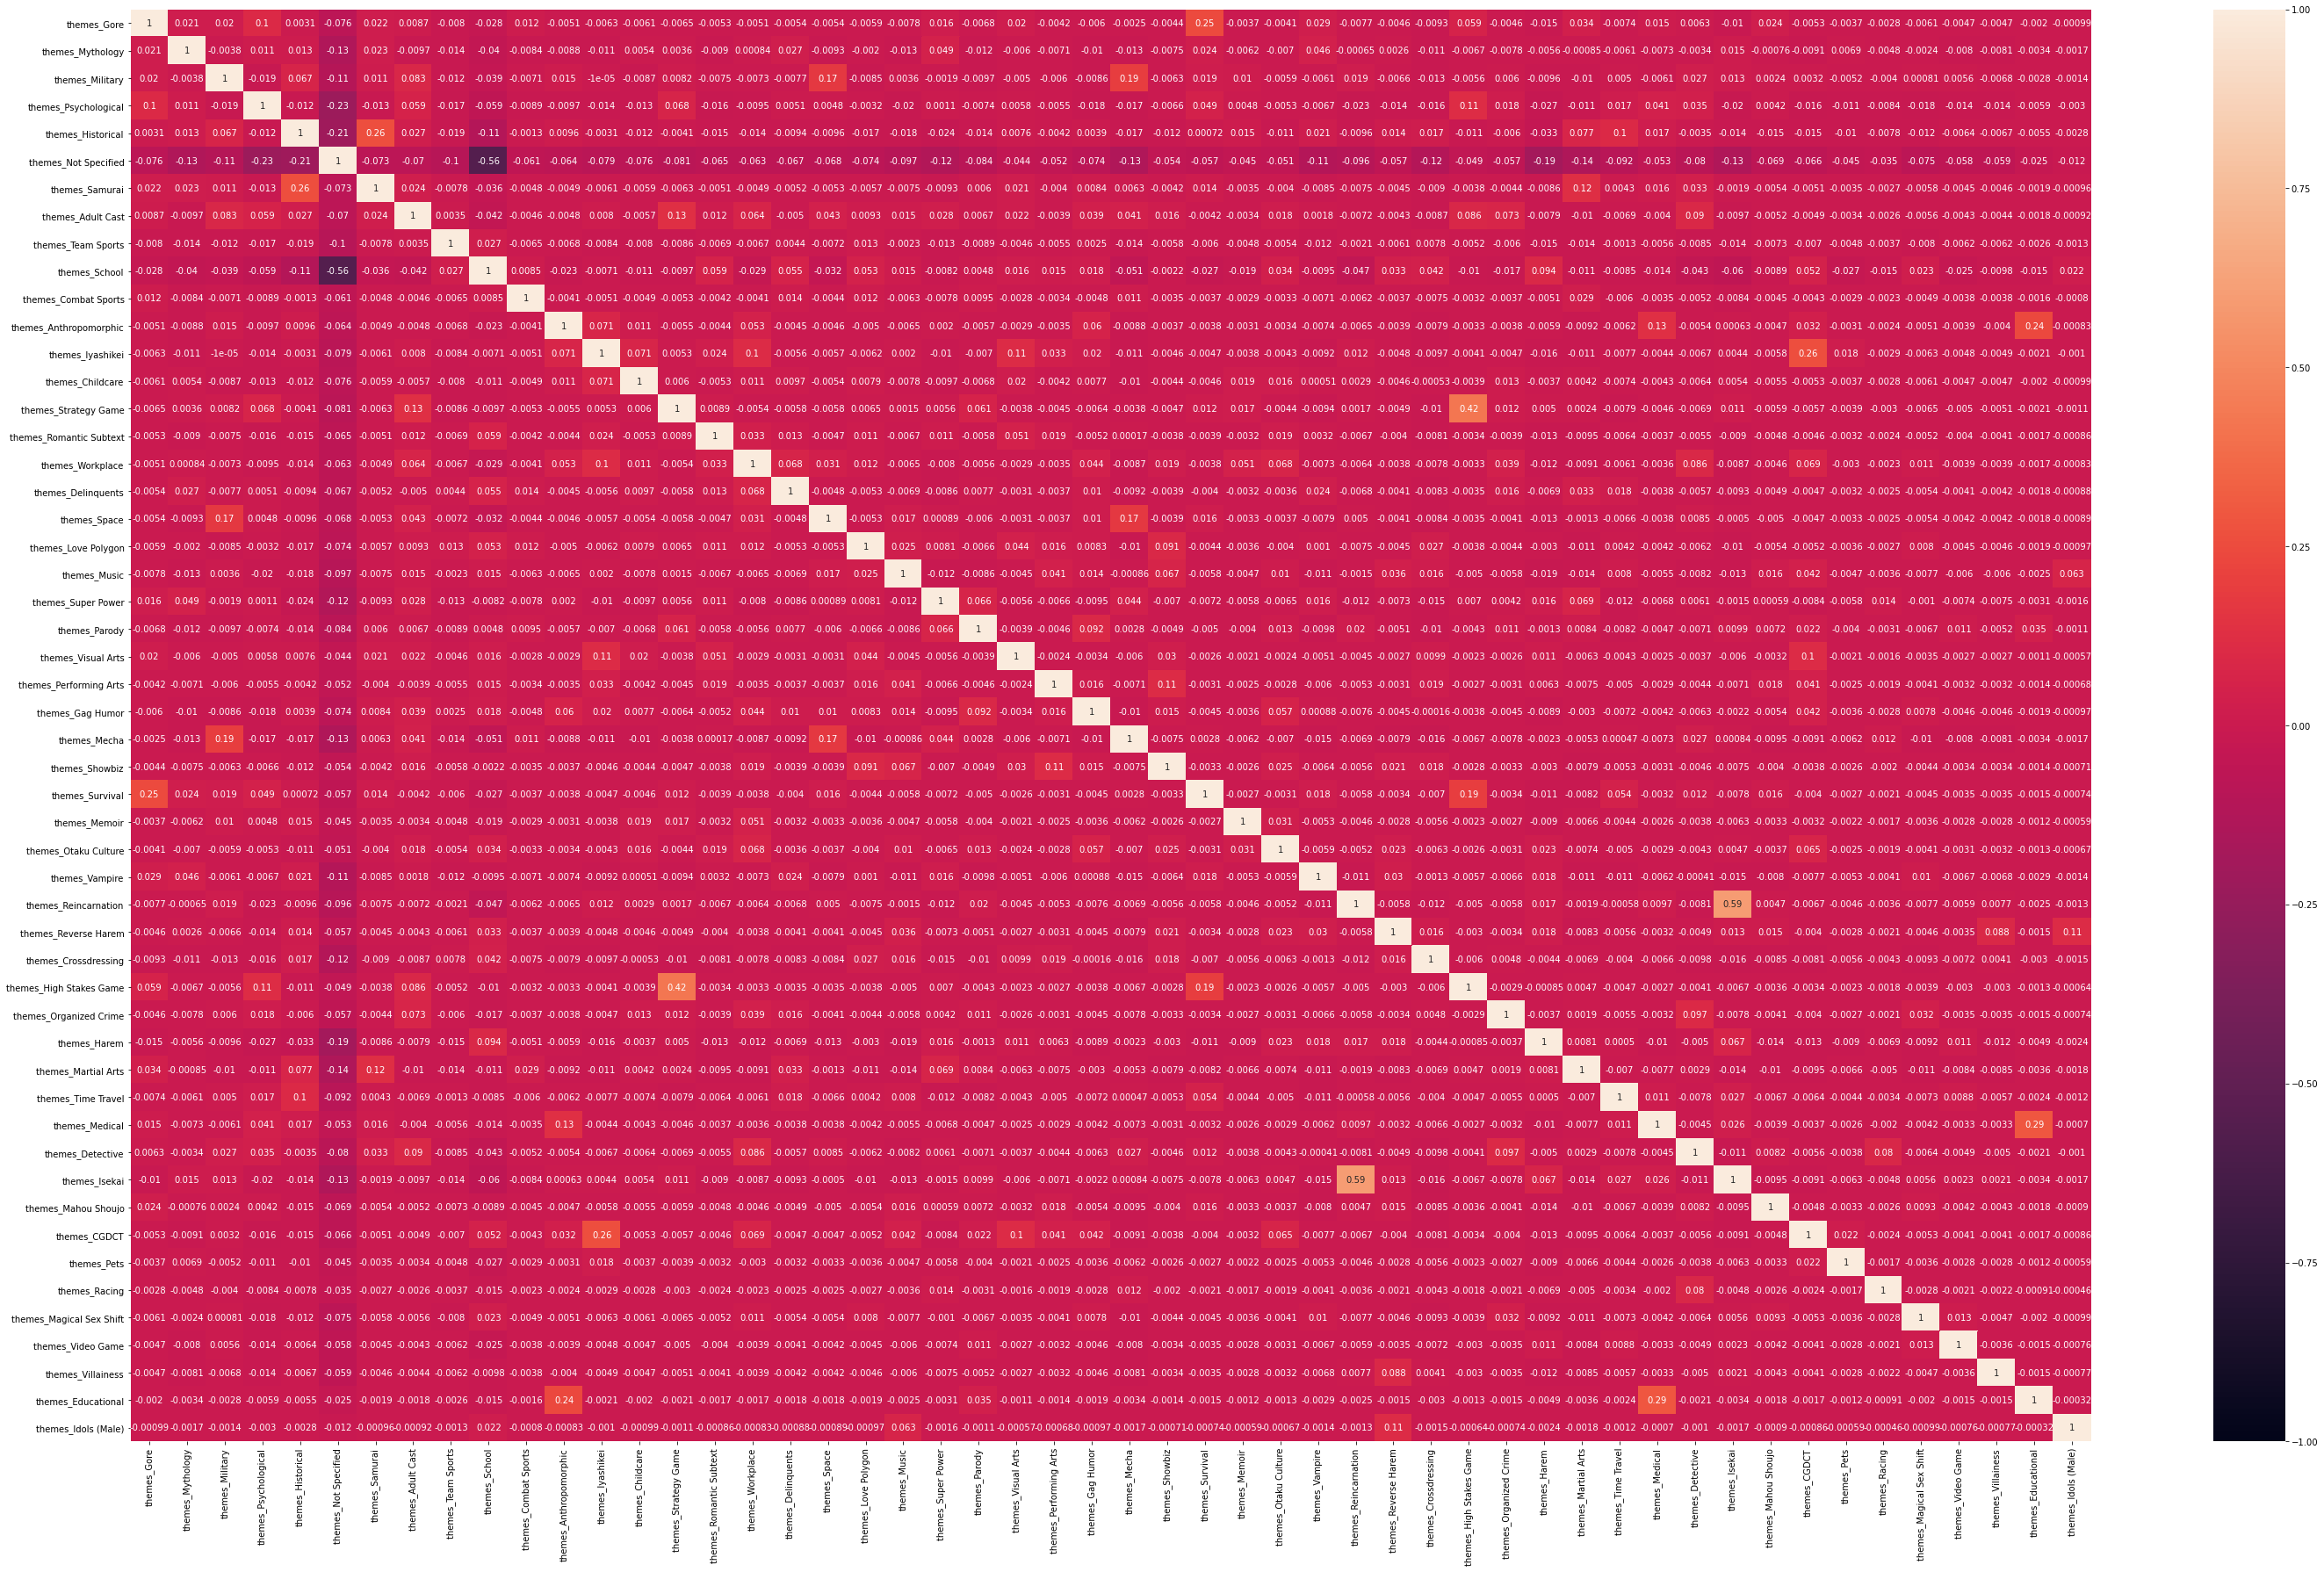

In [184]:
# Correlation matrix between each theme
# No strong pairing
plt.figure(figsize=(50,30))
sns.heatmap(manga_details[themes_features].corr(), vmax=1, vmin=-1, annot=True)

<AxesSubplot:xlabel='published_year_start'>

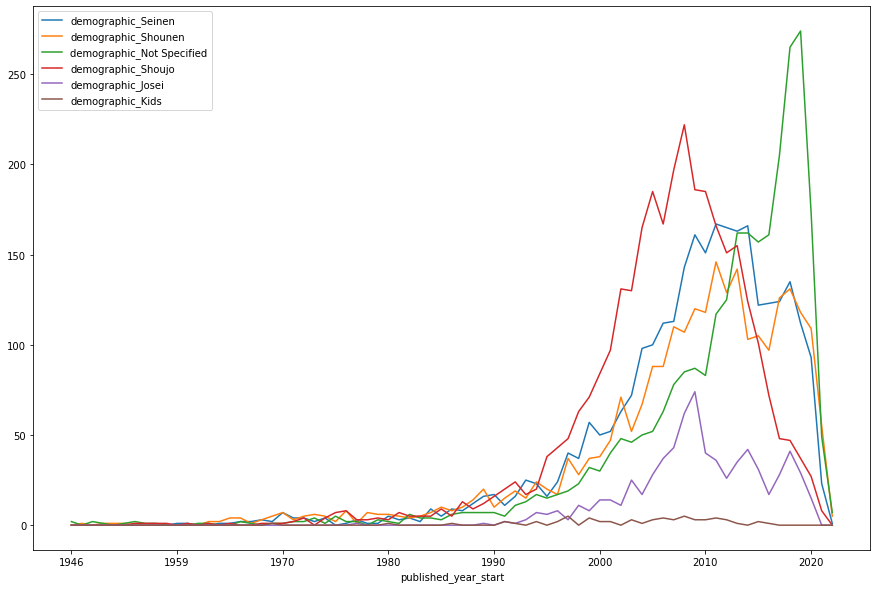

In [185]:
# No of Titles By demographic Group vs Pusblished Year
temp[demographic_features].plot(figsize=(15,10))
# sns.lineplot(x=range(0,10,1), y='genres_Adventure', data=temp)

In [186]:
temp[demographic_features].sum().sort_values(ascending=False)

demographic_Shoujo           3163.0
demographic_Seinen           2888.0
demographic_Not Specified    2763.0
demographic_Shounen          2558.0
demographic_Josei             716.0
demographic_Kids               59.0
dtype: float64

<AxesSubplot:>

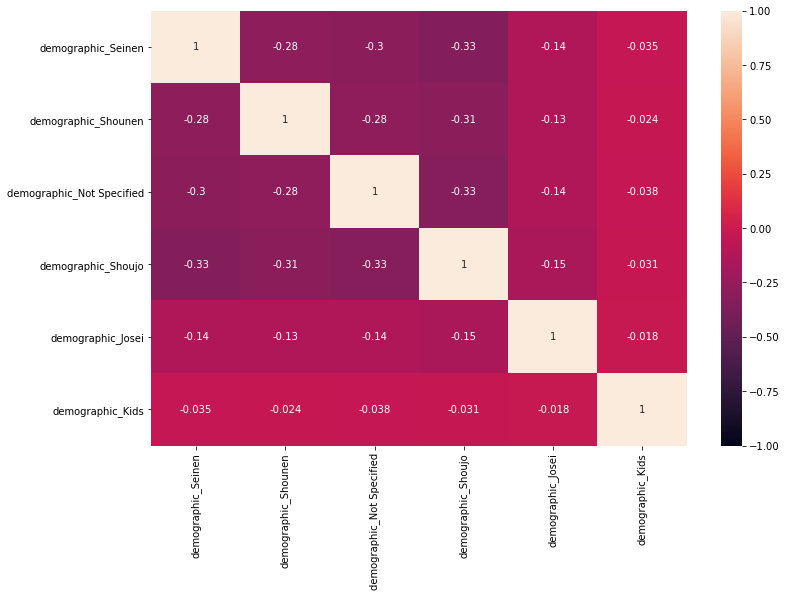

In [187]:
# Correlation matrix between each demograpic
# No strong pairing
plt.figure(figsize=(12,8))
sns.heatmap(manga_details[demographic_features].corr(), vmax=1, vmin=-1, annot=True)

<AxesSubplot:>

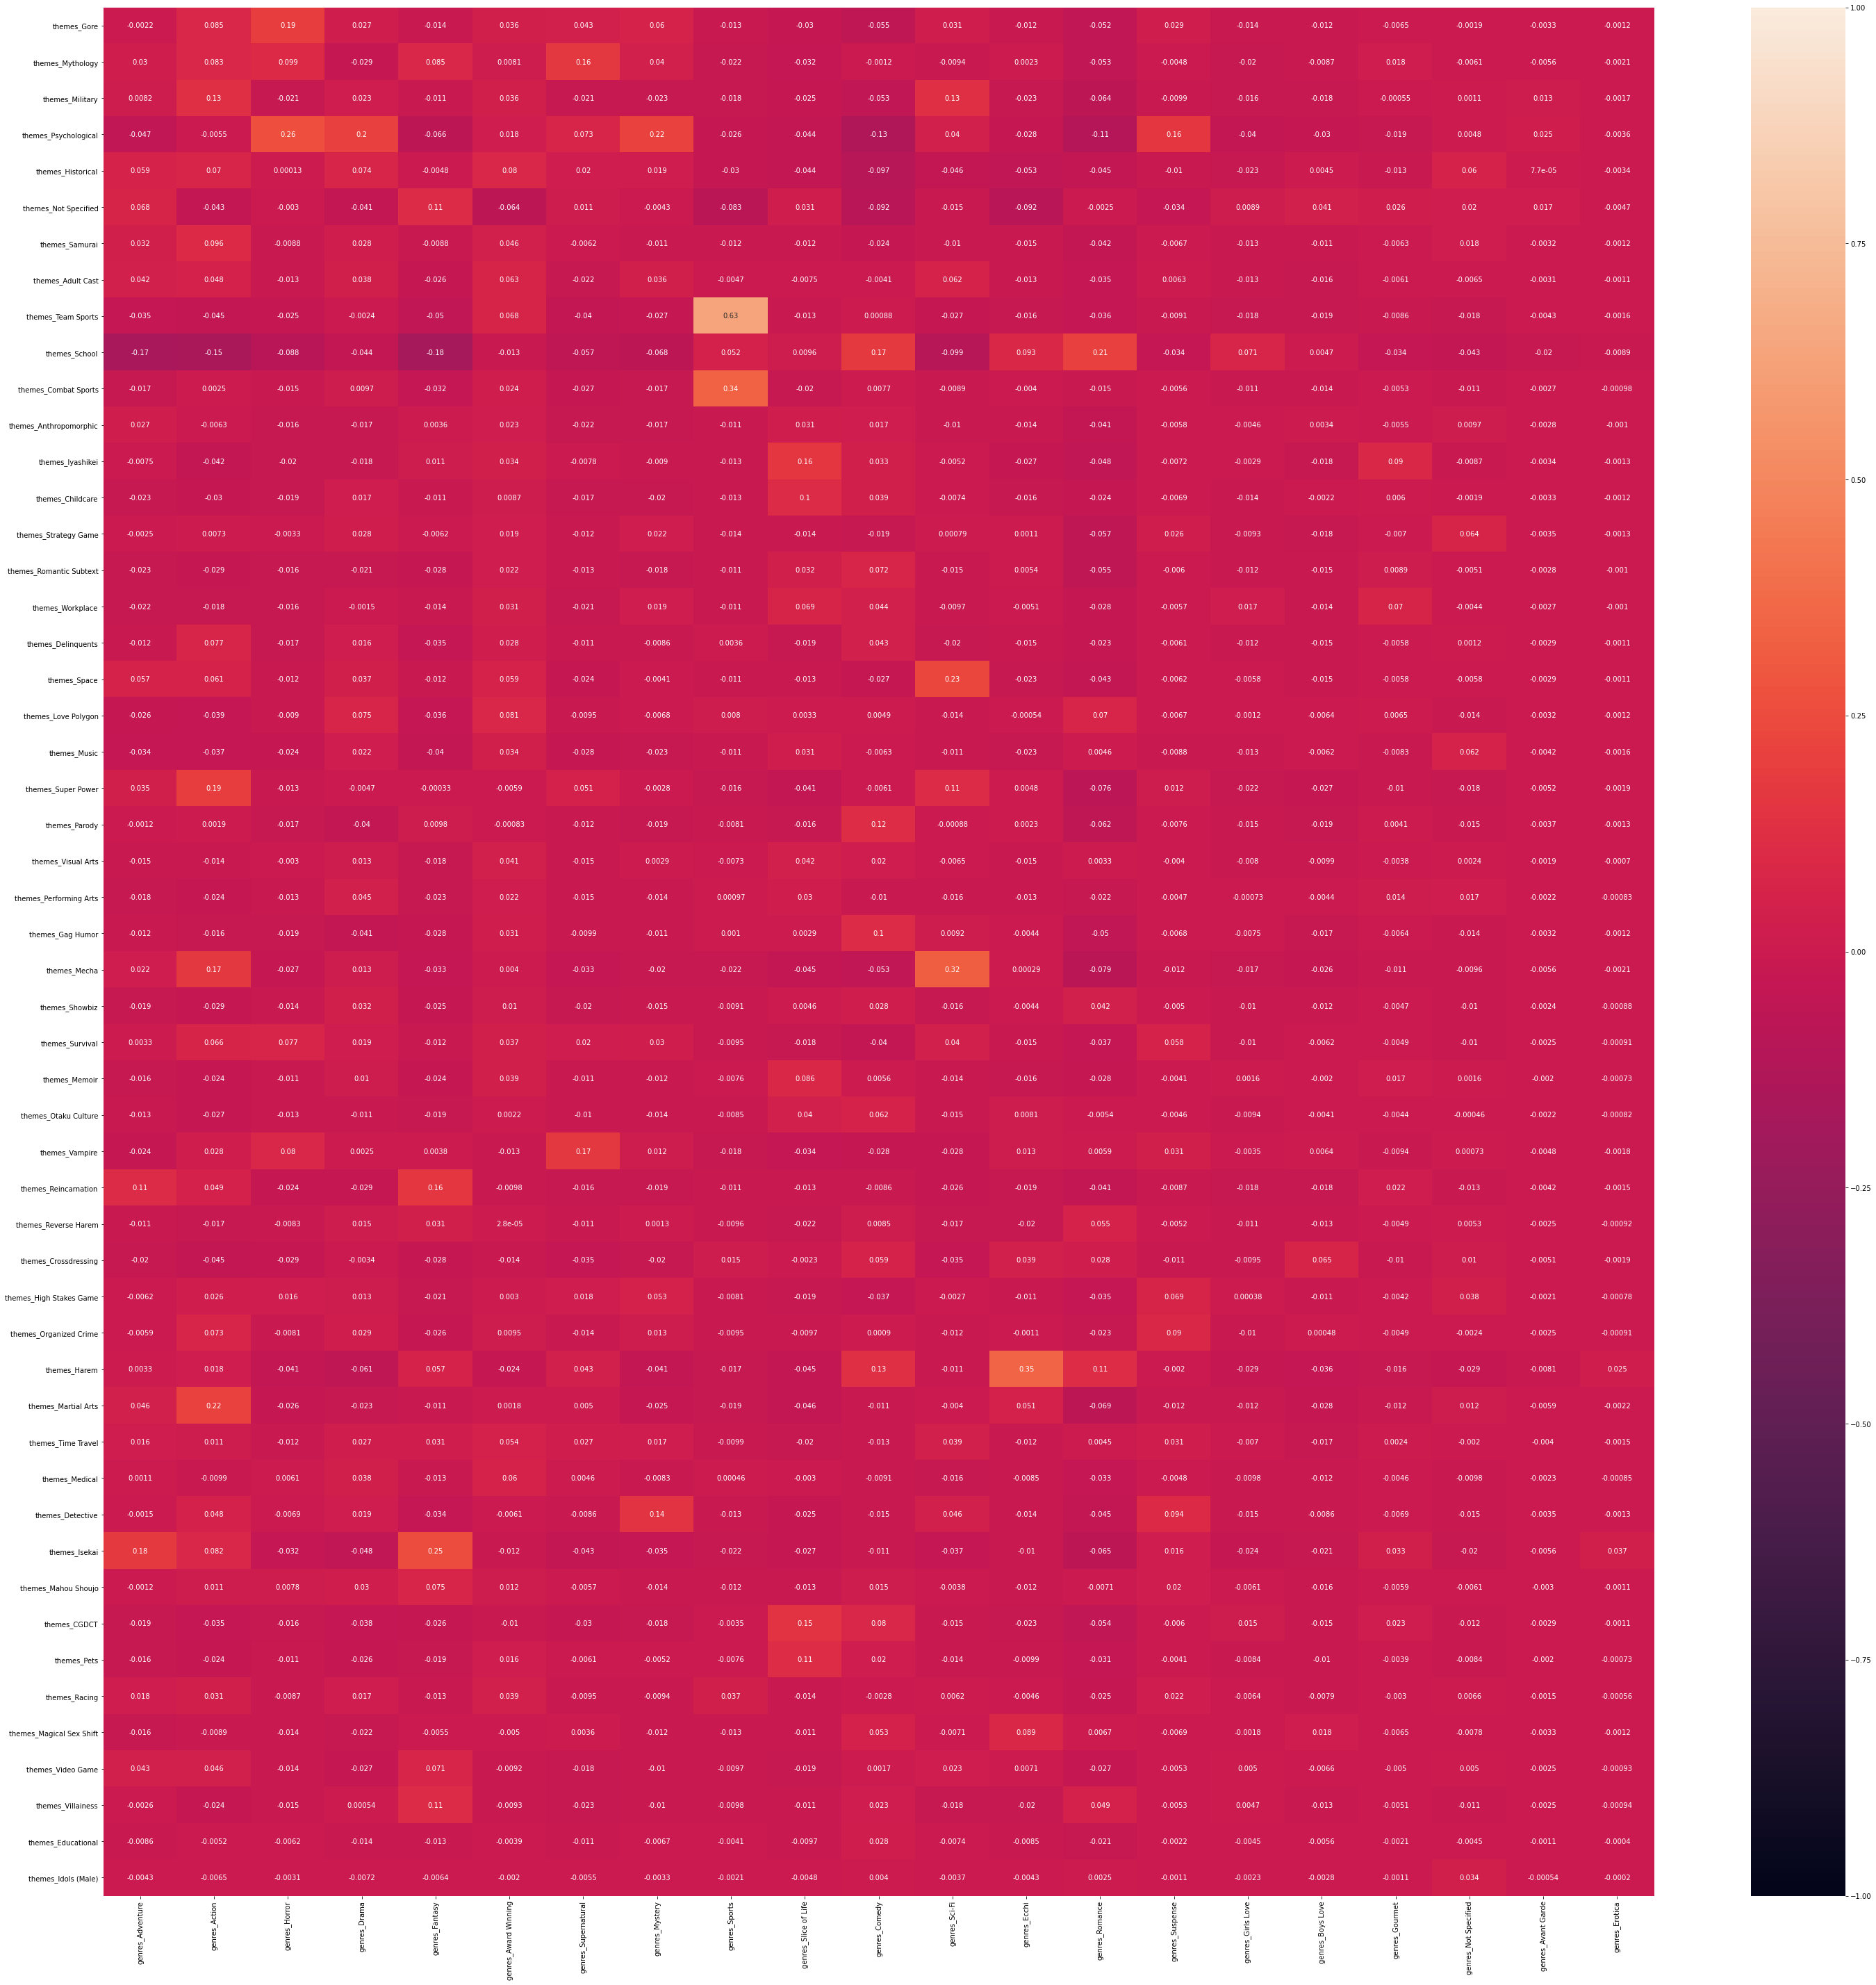

In [188]:
# Correlation between theme and genres
# Decent correlation between team sport and sport but is not as high as it should be.
correlation = manga_details[themes_features+genres_features].corr()
correlation = correlation.loc[themes_features, genres_features]
plt.figure(figsize=(50,50))
sns.heatmap(correlation, vmax=1, vmin=-1, annot=True)

<AxesSubplot:>

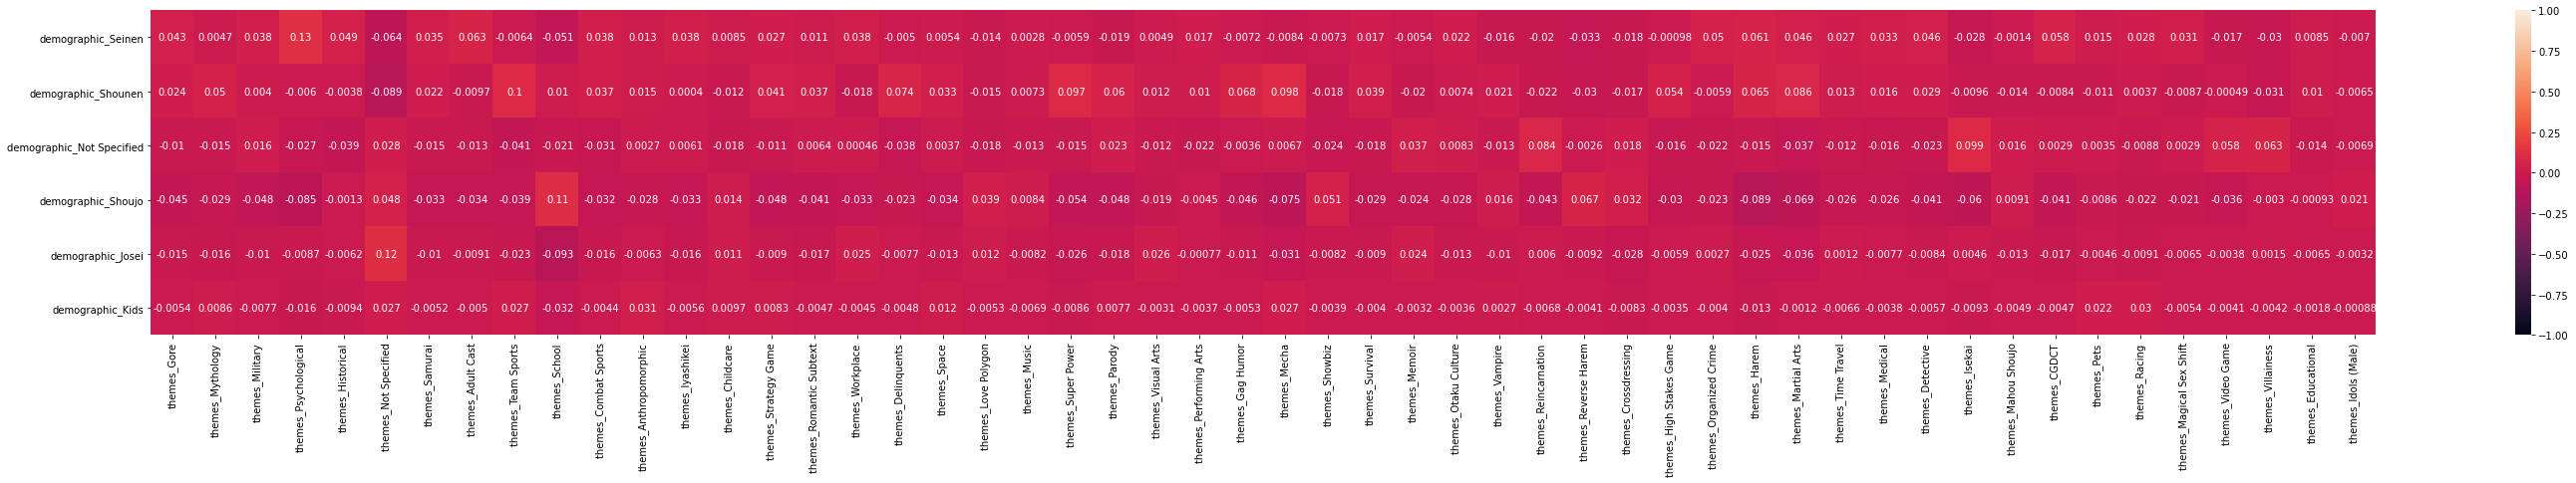

In [189]:
# Correlation between theme and demographic
# No significant pairing
correlation = manga_details[themes_features+demographic_features].corr()
correlation = correlation.loc[demographic_features, themes_features]
plt.figure(figsize=(50,6))
sns.heatmap(correlation, vmax=1, vmin=-1, annot=True)

<AxesSubplot:>

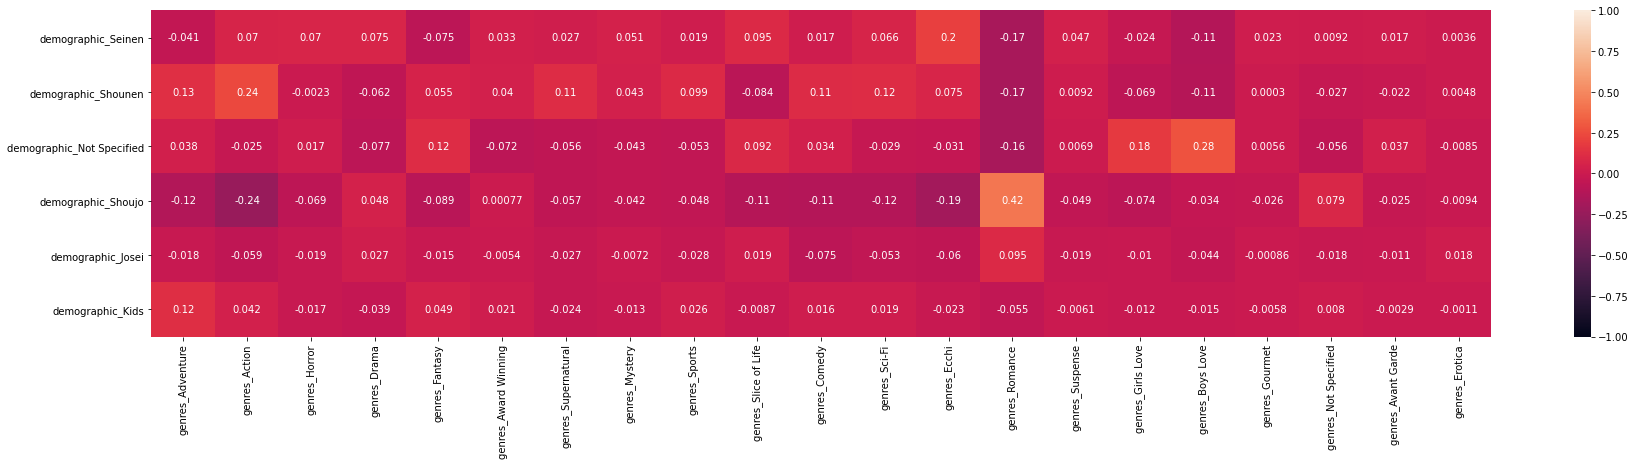

In [190]:
# Correlation between genres and demographic
# No significant pairing
correlation = manga_details[genres_features+demographic_features].corr()
correlation = correlation.loc[demographic_features, genres_features]
plt.figure(figsize=(30,6))
sns.heatmap(correlation, vmax=1, vmin=-1, annot=True)

### Authors
- Tezuka, Osamu has the most titles at ~48 titles
    - Genres are drama, adaventure, Sci-Fi and Action
    - Themes are mainly not specified
    - Usually target the shounen demographic
- CLAMP has the 2nd most titles
    - Genres are fantasy followed by comedy
    - Themes are mainly not specified
    - Usually target the shoujo demographic

In [191]:
temp = manga_details['authors'].value_counts().reset_index()

Text(0.5, 0, 'No of Titles')

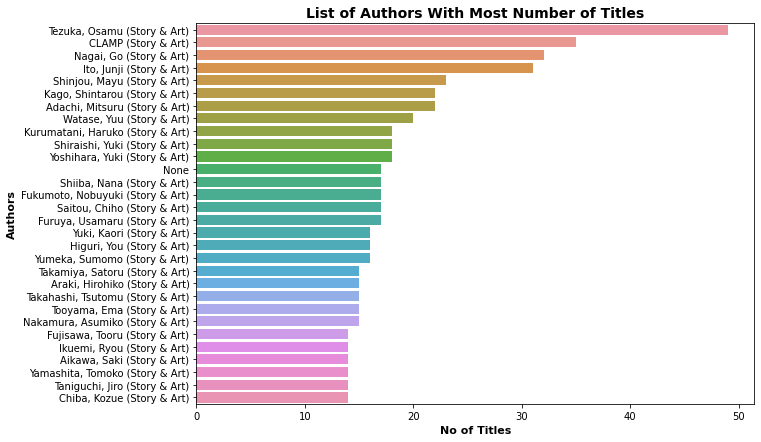

In [192]:
plt.figure(figsize=(10, 7))
sns.barplot(y='index', x='authors', data=temp.head(30))
plt.title("List of Authors With Most Number of Titles", fontweight='bold', fontsize=14)
plt.ylabel('Authors', fontweight='bold', fontsize=11)
plt.xlabel('No of Titles', fontweight='bold', fontsize=11)

In [193]:
# Check how many titles from this author is from each respective genres
manga_details[manga_details['authors']=='Tezuka, Osamu (Story & Art)'][genres_list].sum().sort_values(ascending=False)

genres_Drama            21.0
genres_Adventure        14.0
genres_Sci-Fi           14.0
genres_Action           13.0
genres_Fantasy          12.0
genres_Comedy            6.0
genres_Supernatural      5.0
genres_Mystery           5.0
genres_Award Winning     4.0
genres_Romance           4.0
genres_Horror            3.0
genres_Slice of Life     2.0
genres_Ecchi             1.0
genres_Not Specified     1.0
genres_Sports            0.0
genres_Suspense          0.0
genres_Girls Love        0.0
genres_Boys Love         0.0
genres_Gourmet           0.0
genres_Avant Garde       0.0
genres_Erotica           0.0
dtype: float64

In [194]:
# Check how many titles from this author is from each respective themes
manga_details[manga_details['authors']=='Tezuka, Osamu (Story & Art)'][themes_list].sum().sort_values(ascending=False)

themes_Not Specified        25.0
themes_Psychological         8.0
themes_Historical            8.0
themes_Mecha                 3.0
themes_Crossdressing         3.0
themes_Medical               3.0
themes_Samurai               2.0
themes_Harem                 1.0
themes_Super Power           1.0
themes_Vampire               1.0
themes_School                1.0
themes_Mythology             1.0
themes_Military              1.0
themes_Space                 1.0
themes_High Stakes Game      0.0
themes_Organized Crime       0.0
themes_Martial Arts          0.0
themes_Reverse Harem         0.0
themes_Time Travel           0.0
themes_Mahou Shoujo          0.0
themes_Detective             0.0
themes_Isekai                0.0
themes_CGDCT                 0.0
themes_Pets                  0.0
themes_Racing                0.0
themes_Magical Sex Shift     0.0
themes_Video Game            0.0
themes_Villainess            0.0
themes_Educational           0.0
themes_Reincarnation         0.0
themes_Gor

In [195]:
# Check how many titles from this author is from each respective demographic
manga_details[manga_details['authors']=='Tezuka, Osamu (Story & Art)'][demographic_list].sum().sort_values(ascending=False)

demographic_Shounen          20.0
demographic_Not Specified    13.0
demographic_Seinen           10.0
demographic_Shoujo            6.0
demographic_Josei             0.0
demographic_Kids              0.0
dtype: float64

In [196]:
# Check how many titles from this author is from each respective genres
manga_details[manga_details['authors']=='CLAMP (Story & Art)'][genres_list].sum().sort_values(ascending=False)

genres_Fantasy          21.0
genres_Comedy           15.0
genres_Supernatural     12.0
genres_Drama            12.0
genres_Adventure        11.0
genres_Romance           9.0
genres_Action            7.0
genres_Mystery           5.0
genres_Sci-Fi            3.0
genres_Ecchi             2.0
genres_Boys Love         2.0
genres_Award Winning     1.0
genres_Slice of Life     1.0
genres_Not Specified     1.0
genres_Horror            0.0
genres_Sports            0.0
genres_Suspense          0.0
genres_Girls Love        0.0
genres_Gourmet           0.0
genres_Avant Garde       0.0
genres_Erotica           0.0
dtype: float64

In [197]:
# Check how many titles from this author is from each respective themes
manga_details[manga_details['authors']=='CLAMP (Story & Art)'][themes_list].sum().sort_values(ascending=False)

themes_Not Specified        24.0
themes_School                2.0
themes_Psychological         2.0
themes_Isekai                2.0
themes_Mahou Shoujo          2.0
themes_Mecha                 1.0
themes_Super Power           1.0
themes_Iyashikei             1.0
themes_Strategy Game         1.0
themes_Historical            1.0
themes_Magical Sex Shift     0.0
themes_Martial Arts          0.0
themes_Reincarnation         0.0
themes_Reverse Harem         0.0
themes_Crossdressing         0.0
themes_High Stakes Game      0.0
themes_Organized Crime       0.0
themes_Harem                 0.0
themes_Educational           0.0
themes_Time Travel           0.0
themes_Racing                0.0
themes_Medical               0.0
themes_Detective             0.0
themes_Villainess            0.0
themes_Otaku Culture         0.0
themes_CGDCT                 0.0
themes_Video Game            0.0
themes_Pets                  0.0
themes_Vampire               0.0
themes_Gore                  0.0
themes_Mem

In [198]:
# Check how many titles from this author is from each respective demographic
manga_details[manga_details['authors']=='CLAMP (Story & Art)'][demographic_list].sum().sort_values(ascending=False)

demographic_Shoujo           17.0
demographic_Shounen           8.0
demographic_Seinen            4.0
demographic_Not Specified     4.0
demographic_Josei             2.0
demographic_Kids              1.0
dtype: float64

### User Scores

In [199]:
# Load user scores from file
user_scores = pd.read_csv("../data_cleaned/users_scores_cleaned.csv", keep_default_na=False, na_values=['-', '', ' '])

# To filter out those duplicate titles' index
user_scores = user_scores[user_scores['file_index'].isin(manga_titles['index'])]

In [200]:
# Checking the number of entries
user_scores.shape

(1441255, 9)

In [201]:
# Number of users
user_scores['member'].nunique()

398946

In [202]:
# last_vol and last_chpt showed max values greater than 1
# Meant that these manually created columns still can be improved by filtering outliers
# However since we would not be using these columns, no actions will be done this time.
user_scores.describe()

score    file_index      last_vol     last_chpt  \
count  1.441255e+06  1.441255e+06  1.441255e+06  1.441255e+06   
mean   7.550830e+00  3.250503e+03  9.042525e+00  6.738385e+01   
std    1.619713e+00  2.956728e+03  1.416629e+01  1.196230e+02   
min    1.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00   
25%    7.000000e+00  3.430000e+02  2.000000e+00  1.100000e+01   
50%    8.000000e+00  3.348000e+03  5.000000e+00  2.900000e+01   
75%    9.000000e+00  3.929000e+03  1.100000e+01  7.500000e+01   
max    1.000000e+01  1.039900e+04  3.330000e+02  1.957000e+03   

       max_content_read  
count      1.441255e+06  
mean       8.847441e-01  
std        2.579313e-01  
min        5.109862e-04  
25%        1.000000e+00  
50%        1.000000e+00  
75%        1.000000e+00  
max        1.000000e+00

Text(0, 0.5, 'Count')

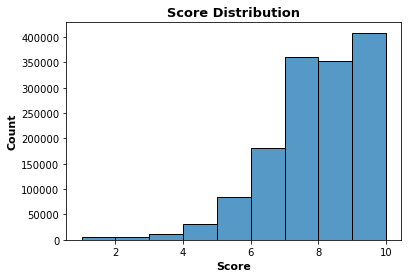

In [203]:
# Plotting distribution of user score
# Scores are top heavy as many users rated titles as 8, 9 and 10
plt.figure(facecolor='white')
sns.histplot(data=user_scores['score'], binwidth=1)
plt.title('Score Distribution', fontweight='bold', fontsize=13)
plt.xlabel('Score', fontweight='bold', fontsize=11)
plt.ylabel('Count', fontweight='bold', fontsize=11)

In [204]:
# Calculate the average manga scores
temp = user_scores.groupby(['title', 'file_index'])[['score']].mean().sort_values('score', ascending=False).reset_index()
temp = temp.merge(user_scores[['title', 'file_index']].value_counts().reset_index(), on=['title', 'file_index'])
temp.rename(columns={0: "no_of_users"}, inplace=True)
temp['file_index_title'] = temp['file_index'].astype(str) + "_" + temp['title']

In [205]:
# Average score ranges from 5.706667 to 9.638804
temp.describe()

file_index        score  no_of_users
count   2151.000000  2151.000000  2151.000000
mean    4094.876337     7.410613   670.039517
std     3206.133145     0.624869   464.285695
min        0.000000     5.706667    60.000000
25%     3037.500000     7.049793   259.000000
50%     3584.000000     7.356868   590.000000
75%     4121.500000     7.701731   988.000000
max    10399.000000     9.638804  2807.000000

Text(0, 0.5, "Manga's Title")

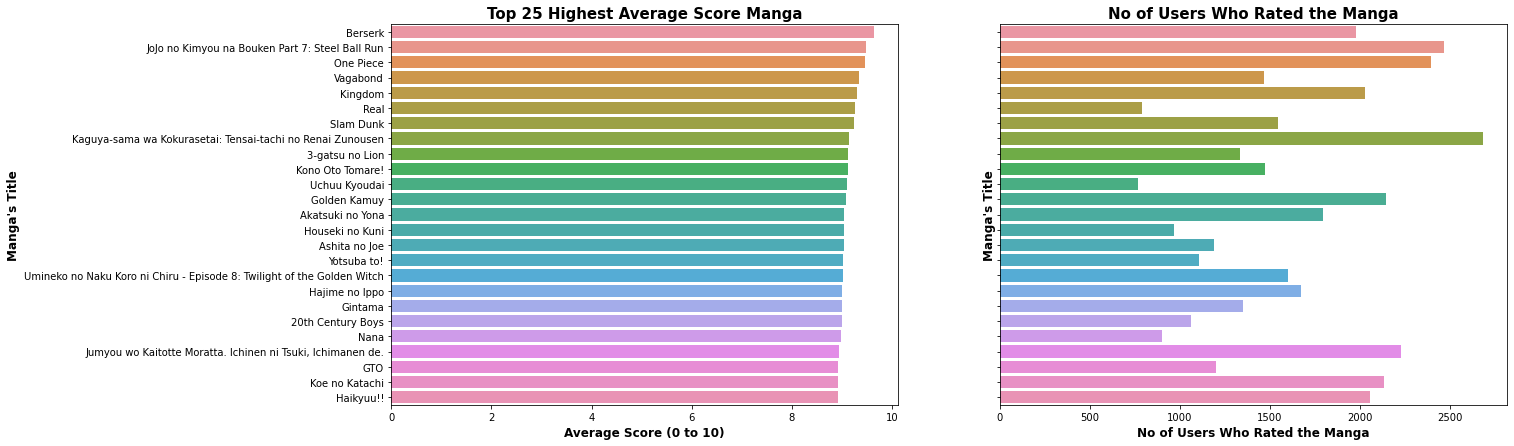

In [206]:
# Plot the 25 highest average score (user rated) mangas
# Top 3 mangas are 'Berserk', 'JoJo no Kimyou na Bouken Part 7: Steel Ball Run', 'One Piece'
temp.sort_values(by='score', ascending=False, inplace=True)

# Plot the Scores for the top 25 titles
fig, ax = plt.subplots(1,2, figsize=(20,7), sharey=True, facecolor='white')
sns.barplot(x='score', y='title', data=temp.iloc[0:25], ax=ax[0])
ax[0].set_title('Top 25 Highest Average Score Manga', fontweight='bold', fontsize=15)
ax[0].set_xlabel('Average Score (0 to 10)', fontweight='bold', fontsize=12)
ax[0].set_ylabel("Manga's Title", fontweight='bold', fontsize=12)

# Plot the number of users who rated for the 25 titles
sns.barplot(x='no_of_users', y='title', data=temp.iloc[0:25], ax=ax[1])
ax[1].set_title('No of Users Who Rated the Manga', fontweight='bold', fontsize=15)
ax[1].set_xlabel('No of Users Who Rated the Manga', fontweight='bold', fontsize=12)
ax[1].set_ylabel("Manga's Title", fontweight='bold', fontsize=12)

Text(0, 0.5, "Manga's Title")

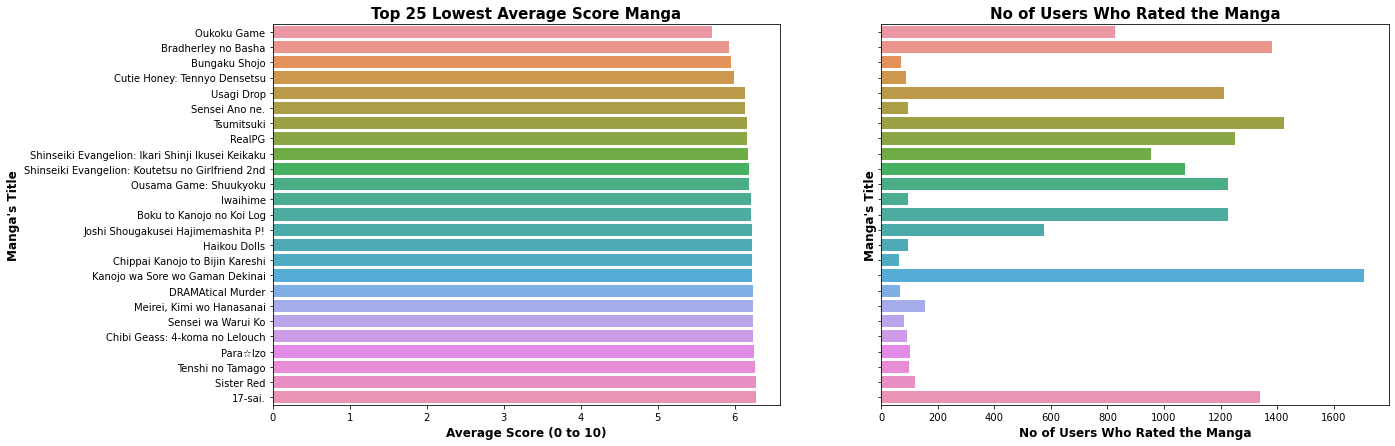

In [207]:
# Plot the 25 lowest average score (user rated) mangas
# Bottom 3 mangas are 'Oukoku Game', 'Bradherley no Basha', 'Bungaku Shojo'
temp.sort_values(by='score', ascending=True, inplace=True)

# Plot the Scores for the bottom 25 titles
fig, ax = plt.subplots(1,2, figsize=(20,7), sharey=True, facecolor='white')
sns.barplot(x='score', y='title', data=temp.iloc[0:25], ax=ax[0])
ax[0].set_title('Top 25 Lowest Average Score Manga', fontweight='bold', fontsize=15)
ax[0].set_xlabel('Average Score (0 to 10)', fontweight='bold', fontsize=12)
ax[0].set_ylabel("Manga's Title", fontweight='bold', fontsize=12)

# Plot the number of users who rated for the 25 titles
sns.barplot(x='no_of_users', y='title', data=temp.iloc[0:25], ax=ax[1])
ax[1].set_title('No of Users Who Rated the Manga', fontweight='bold', fontsize=15)
ax[1].set_xlabel('No of Users Who Rated the Manga', fontweight='bold', fontsize=12)
ax[1].set_ylabel("Manga's Title", fontweight='bold', fontsize=12)

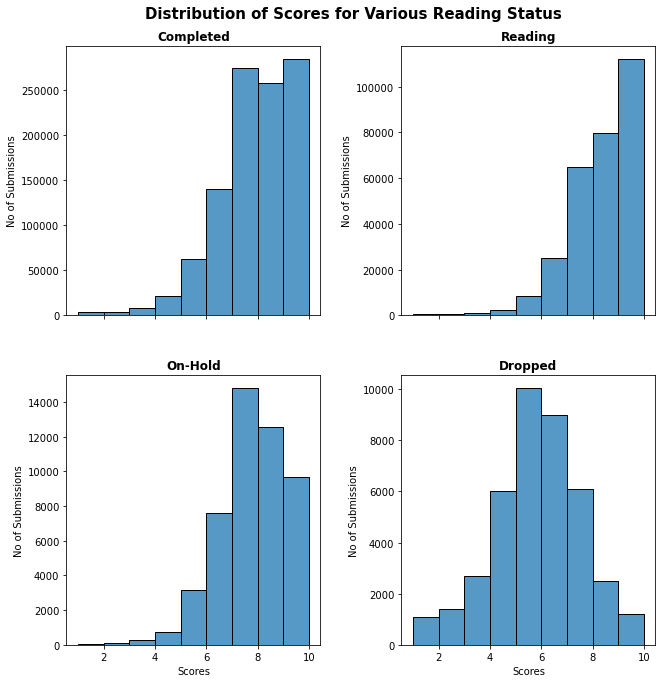

In [208]:
# Score of titles for the 4 different user status
# Dropped titles tended to have lowest average score while on-hold titles have slightly higher scores
# Readers tend to give higher score for titles that they are still reading
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, facecolor='white')
plt.tight_layout(pad=5)
fig.suptitle('Distribution of Scores for Various Reading Status', fontweight='bold', fontsize=15)
for index, value in enumerate(user_scores['status'].unique()):
    sns.histplot(x=user_scores[(user_scores['status']==value)]['score'], ax=ax[int(index/2), index%2], binwidth=1)
    ax[int(index/2), index%2].set_title(value, fontweight='bold')
    ax[int(index/2), index%2].set_ylabel('No of Submissions')
    ax[int(index/2), index%2].set_xlabel('Scores')

### Merge all 3 data sets together

In [209]:
# Merge user and manga detail data set together
manga_details.rename(columns={'status': 'publication_status'}, inplace=True)
user_scores.rename(columns={'status': 'read_status'}, inplace=True)
data_merge = manga_titles.merge(manga_details, left_on=['index', 'manga_title'], right_on=['index', 'title'])
data_merge.drop(columns=['title'], inplace=True)
data_merge = data_merge.merge(user_scores, left_on=['index', 'manga_title'], right_on=['file_index', 'title'])
data_merge.drop(columns=['title', 'file_index'], inplace=True)

In [210]:
# Calculate the average score of each title
title_avg_score = data_merge.groupby('index')['score'].mean().reset_index()
title_avg_score.rename(columns = {'score': 'title_avg_score'}, inplace=True)

In [211]:
# Add title average score to the merged data set
data_merge = data_merge.merge(title_avg_score, on='index')

In [212]:
# Statistic for the merged dataset
data_merge.describe()

index  genres_Adventure  genres_Action  genres_Horror  \
count  1.434060e+06      1.434060e+06   1.434060e+06   1.434060e+06   
mean   3.231303e+03      1.108161e-01   2.252186e-01   6.955497e-02   
std    2.951653e+03      3.139044e-01   4.177264e-01   2.543956e-01   
min    0.000000e+00      0.000000e+00   0.000000e+00   0.000000e+00   
25%    3.410000e+02      0.000000e+00   0.000000e+00   0.000000e+00   
50%    3.343000e+03      0.000000e+00   0.000000e+00   0.000000e+00   
75%    3.922000e+03      0.000000e+00   0.000000e+00   0.000000e+00   
max    1.039900e+04      1.000000e+00   1.000000e+00   1.000000e+00   

       genres_Drama  genres_Fantasy  genres_Award Winning  \
count  1.434060e+06    1.434060e+06          1.434060e+06   
mean   3.109361e-01    1.805671e-01          8.707516e-02   
std    4.628769e-01    3.846592e-01          2.819453e-01   
min    0.000000e+00    0.000000e+00          0.000000e+00   
25%    0.000000e+00    0.000000e+00          0.000000e+00   
50%    0.000000e+00    0.000000e+00          0.000000e+00   
75%    1.000000e+00    0.000000e+00          0.000000e+00   
max    1.000000e+00    1.000000e+00          1.000000e+00   

       genres_Supernatural  genres_Mystery  genres_Sports  ...  \
count         1.434060e+06    1.434060e+06   1.434060e+06  ...   
mean          1.768029e-01    7.666904e-02   3.275525e-02  ...   
std           3.815020e-01    2.660657e-01   1.779954e-01  ...   
min           0.000000e+00    0.000000e+00   0.000000e+00  ...   
25%           0.000000e+00    0.000000e+00   0.000000e+00  ...   
50%           0.000000e+00    0.000000e+00   0.000000e+00  ...   
75%           0.000000e+00    0.000000e+00   0.000000e+00  ...   
max           1.000000e+00    1.000000e+00   1.000000e+00  ...   

       demographic_Shounen  demographic_Not Specified  demographic_Shoujo  \
count         1.434060e+06               1.434060e+06        1.434060e+06   
mean          2.635245e-01               1.860194e-01        2.709231e-01   
std           4.405445e-01               3.891225e-01        4.444366e-01   
min           0.000000e+00               0.000000e+00        0.000000e+00   
25%           0.000000e+00               0.000000e+00        0.000000e+00   
50%           0.000000e+00               0.000000e+00        0.000000e+00   
75%           1.000000e+00               0.000000e+00        1.000000e+00   
max           1.000000e+00               1.000000e+00        1.000000e+00   

       demographic_Josei  demographic_Kids         score      last_vol  \
count       1.434060e+06      1.434060e+06  1.434060e+06  1.434060e+06   
mean        3.845864e-02      5.656667e-03  7.554782e+00  9.070569e+00   
std         1.923008e-01      7.499782e-02  1.618606e+00  1.419517e+01   
min         0.000000e+00      0.000000e+00  1.000000e+00  1.000000e+00   
25%         0.000000e+00      0.000000e+00  7.000000e+00  2.000000e+00   
50%         0.000000e+00      0.000000e+00  8.000000e+00  5.000000e+00   
75%         0.000000e+00      0.000000e+00  9.000000e+00  1.100000e+01   
max         1.000000e+00      1.000000e+00  1.000000e+01  3.330000e+02   

          last_chpt  max_content_read  title_avg_score  
count  1.434060e+06      1.434060e+06     1.434060e+06  
mean   6.760867e+01      8.846677e-01     7.554782e+00  
std    1.198706e+02      2.579803e-01     6.839782e-01  
min    1.000000e+00      5.109862e-04     5.706667e+00  
25%    1.100000e+01      1.000000e+00     7.153846e+00  
50%    2.900000e+01      1.000000e+00     7.354962e+00  
75%    7.500000e+01      1.000000e+00     8.173427e+00  
max    1.957000e+03      1.000000e+00     9.638804e+00  

[8 rows x 85 columns]

In [213]:
# Checking the number of titles left after merge
# 2137 titles remained
data_merge.groupby('index')['manga_title'].count().shape

(2137,)

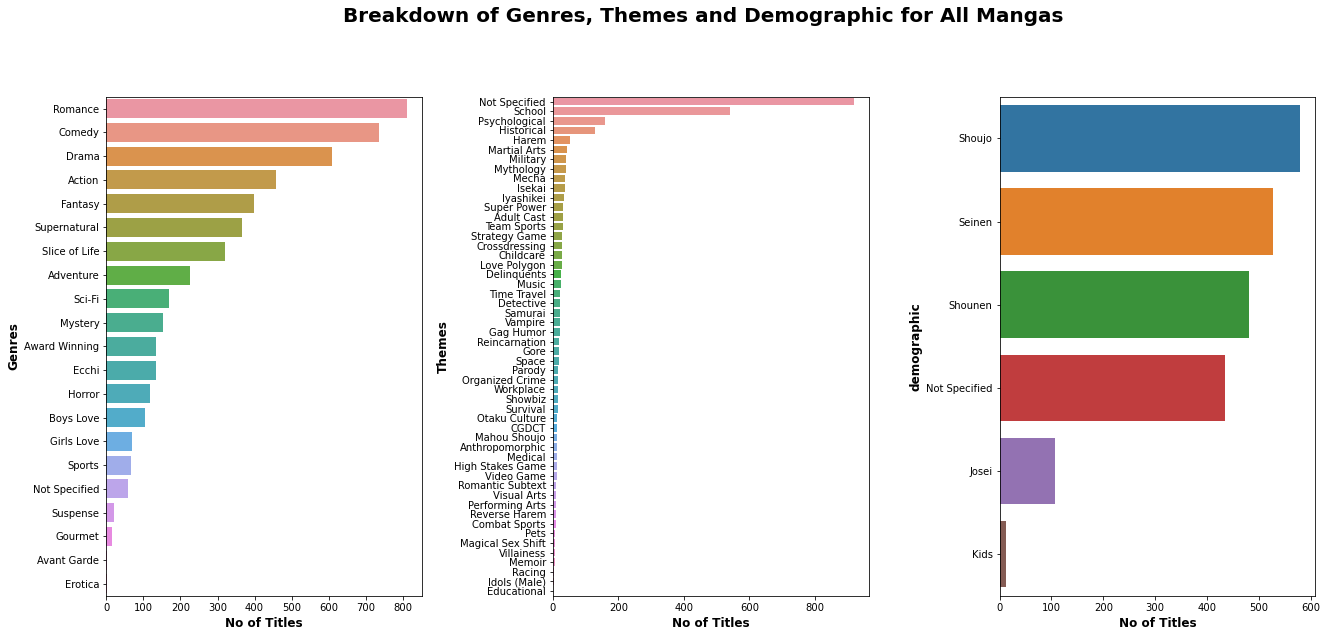

In [214]:
# To determine how titles are in each genres, themes, demogrpahic (Titles will appear twice)
fig, ax = plt.subplots(1, 3, figsize = (20,10), facecolor='white')
plt.tight_layout(pad=10)

################################

# For genres
genres_list = [col for col in manga_details.columns if 'genres' in col]
temp = manga_details[manga_details['index'].isin(data_merge['index'].unique())]
temp = temp[genres_list].sum().reset_index()
temp.rename(columns={'index': 'genres', 0:'counts'}, inplace=True)
temp['genres'] = temp['genres'].apply(lambda x: x.replace('genres_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='genres', data=temp, ax=ax[0])
ax[0].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[0].set_ylabel('Genres', fontweight = 'bold', fontsize=12)

#################################

# For Themes
themes_list = [col for col in manga_details.columns if 'themes' in col]
temp = manga_details[manga_details['index'].isin(data_merge['index'].unique())]
temp = temp[themes_list].sum().reset_index()
temp.rename(columns={'index': 'themes', 0:'counts'}, inplace=True)
temp['themes'] = temp['themes'].apply(lambda x: x.replace('themes_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='themes', data=temp, ax=ax[1])
ax[1].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[1].set_ylabel('Themes', fontweight = 'bold', fontsize=12)

################################

# For demographic
demographic_list = [col for col in manga_details.columns if 'demographic' in col]
temp = manga_details[manga_details['index'].isin(data_merge['index'].unique())]
temp = temp[demographic_list].sum().reset_index()
temp.rename(columns={'index': 'demographic', 0:'counts'}, inplace=True)
temp['demographic'] = temp['demographic'].apply(lambda x: x.replace('demographic_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='demographic', data=temp, ax=ax[2])
ax[2].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[2].set_ylabel('demographic', fontweight = 'bold', fontsize=12)

##################################

# Set Overall Title
fig.suptitle("Breakdown of Genres, Themes and Demographic for All Mangas", fontweight = 'bold', fontsize= 20);

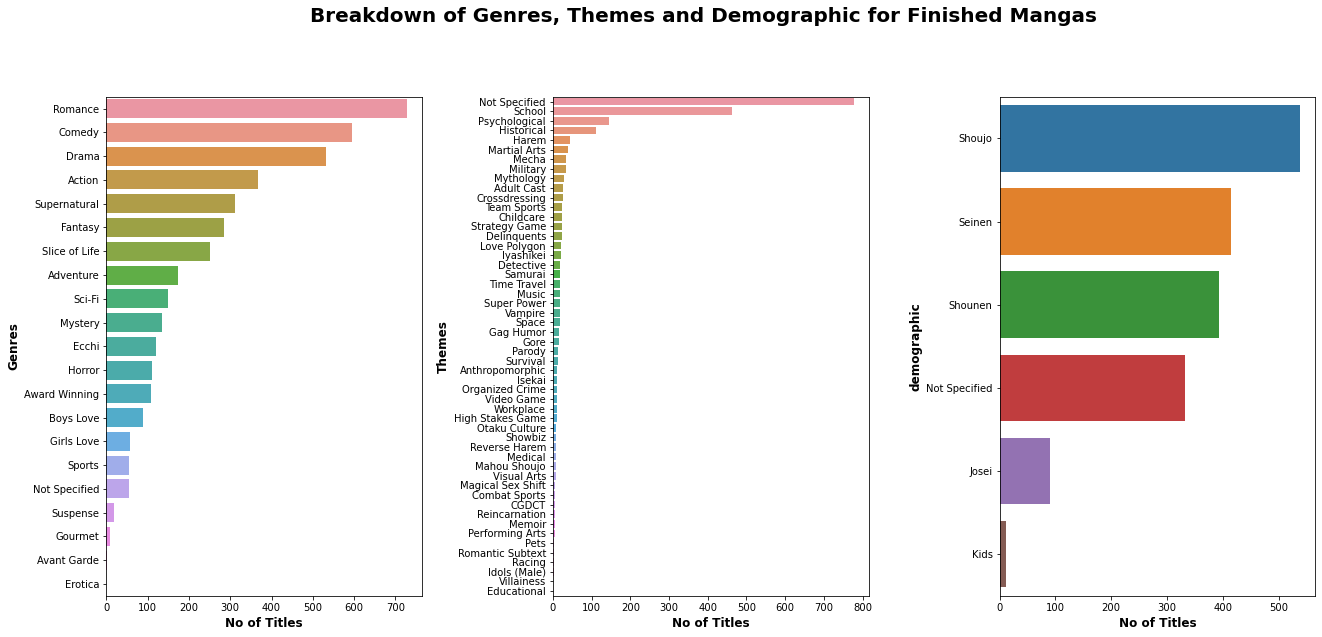

In [215]:
# Which genres, themes, demogrpahic does finished titles belongs to?
fig, ax = plt.subplots(1, 3, figsize = (20,10), facecolor='white')
plt.tight_layout(pad=10)

################################

# For genres
genres_list = [col for col in manga_details.columns if 'genres' in col]
temp = manga_details[(manga_details['index'].isin(data_merge['index'].unique()))&(manga_details['publication_status']=='Finished')]
temp = temp[genres_list].sum().reset_index()
temp.rename(columns={'index': 'genres', 0:'counts'}, inplace=True)
temp['genres'] = temp['genres'].apply(lambda x: x.replace('genres_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='genres', data=temp, ax=ax[0])
ax[0].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[0].set_ylabel('Genres', fontweight = 'bold', fontsize=12)

#################################

# For Themes
themes_list = [col for col in manga_details.columns if 'themes' in col]
temp = manga_details[(manga_details['index'].isin(data_merge['index'].unique()))&(manga_details['publication_status']=='Finished')]
temp = temp[themes_list].sum().reset_index()
temp.rename(columns={'index': 'themes', 0:'counts'}, inplace=True)
temp['themes'] = temp['themes'].apply(lambda x: x.replace('themes_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='themes', data=temp, ax=ax[1])
ax[1].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[1].set_ylabel('Themes', fontweight = 'bold', fontsize=12)

################################

# For demographic
demographic_list = [col for col in manga_details.columns if 'demographic' in col]
temp = manga_details[(manga_details['index'].isin(data_merge['index'].unique()))&(manga_details['publication_status']=='Finished')]
temp = temp[demographic_list].sum().reset_index()
temp.rename(columns={'index': 'demographic', 0:'counts'}, inplace=True)
temp['demographic'] = temp['demographic'].apply(lambda x: x.replace('demographic_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='demographic', data=temp, ax=ax[2])
ax[2].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[2].set_ylabel('demographic', fontweight = 'bold', fontsize=12)

##################################

# Set Overall Title
fig.suptitle("Breakdown of Genres, Themes and Demographic for Finished Mangas", fontweight = 'bold', fontsize= 20);

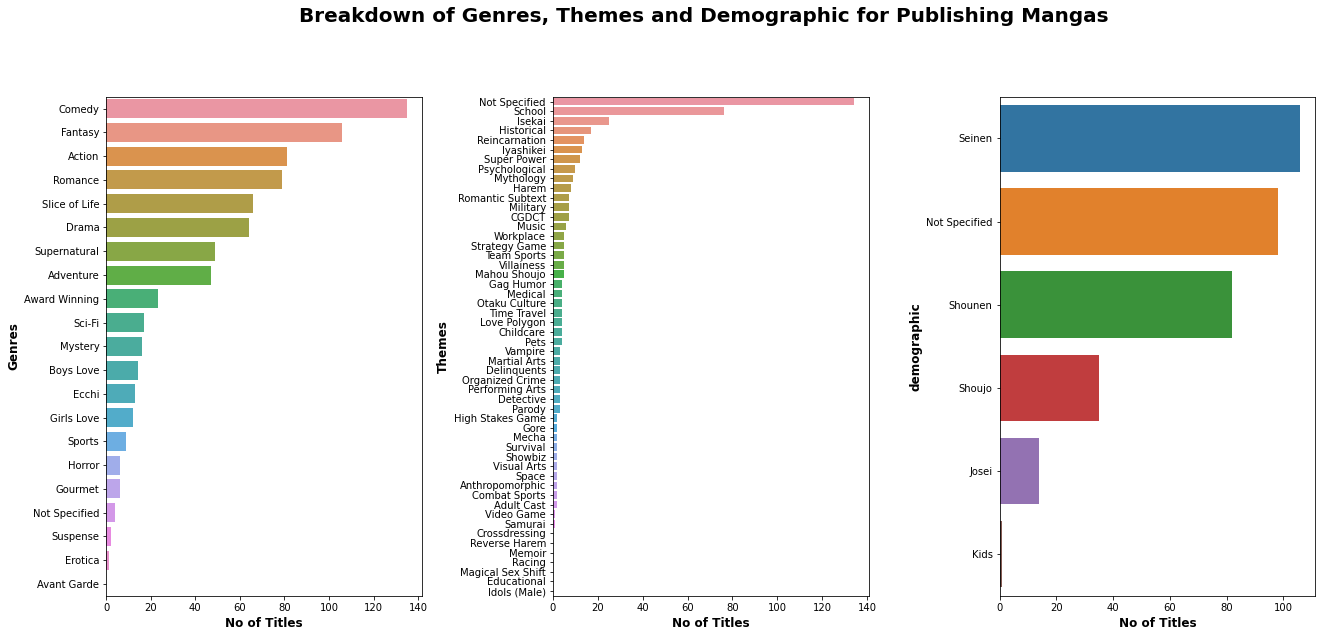

In [216]:
# Which genres, themes, demogrpahic does publishing titles belongs to?
fig, ax = plt.subplots(1, 3, figsize = (20,10), facecolor='white')
plt.tight_layout(pad=10)

################################

# For genres
genres_list = [col for col in manga_details.columns if 'genres' in col]
temp = manga_details[(manga_details['index'].isin(data_merge['index'].unique()))&(manga_details['publication_status']=='Publishing')]
temp = temp[genres_list].sum().reset_index()
temp.rename(columns={'index': 'genres', 0:'counts'}, inplace=True)
temp['genres'] = temp['genres'].apply(lambda x: x.replace('genres_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='genres', data=temp, ax=ax[0])
ax[0].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[0].set_ylabel('Genres', fontweight = 'bold', fontsize=12)

#################################

# For Themes
themes_list = [col for col in manga_details.columns if 'themes' in col]
temp = manga_details[(manga_details['index'].isin(data_merge['index'].unique()))&(manga_details['publication_status']=='Publishing')]
temp = temp[themes_list].sum().reset_index()
temp.rename(columns={'index': 'themes', 0:'counts'}, inplace=True)
temp['themes'] = temp['themes'].apply(lambda x: x.replace('themes_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='themes', data=temp, ax=ax[1])
ax[1].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[1].set_ylabel('Themes', fontweight = 'bold', fontsize=12)

################################

# For demographic
demographic_list = [col for col in manga_details.columns if 'demographic' in col]
temp = manga_details[(manga_details['index'].isin(data_merge['index'].unique()))&(manga_details['publication_status']=='Publishing')]
temp = temp[demographic_list].sum().reset_index()
temp.rename(columns={'index': 'demographic', 0:'counts'}, inplace=True)
temp['demographic'] = temp['demographic'].apply(lambda x: x.replace('demographic_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

# Plot bar graph for No of titles vs volumes
sns.barplot(x='counts', y='demographic', data=temp, ax=ax[2])
ax[2].set_xlabel('No of Titles', fontweight = 'bold', fontsize=12)
ax[2].set_ylabel('demographic', fontweight = 'bold', fontsize=12)

##################################

# Set Overall Title
fig.suptitle("Breakdown of Genres, Themes and Demographic for Publishing Mangas", fontweight = 'bold', fontsize= 20);

In [217]:
# Average score given by member and the number of titles they read
# wopian read the most titles but the average score is below the mean of the dataset
temp = data_merge.groupby(['member'])['score'].agg(['mean', 'count']).sort_values('count', ascending=False)
temp.rename(columns={'mean': 'average_score', 'count': 'no_of_titles'}, inplace=True)
temp

average_score  no_of_titles
member                                 
wopian           6.989329          1312
dxdo             7.175563           843
DateYutaka       7.857380           603
NNnL             5.623819           529
hoppph           9.324324           481
...                   ...           ...
Pik0nom          9.000000             1
PikMike         10.000000             1
Pika10032        9.000000             1
Pika845         10.000000             1
Saryyh           9.000000             1

[397774 rows x 2 columns]

Text(0, 0.5, 'Number of Readers')

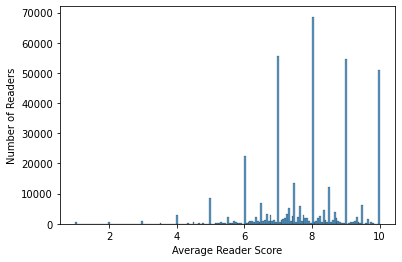

In [218]:
# Plot the average user score distribution
# There are multiple peaks which are probably caused by readers with only 1 submission
sns.histplot(data=temp['average_score'])
plt.xlabel('Average Reader Score')
plt.ylabel('Number of Readers')

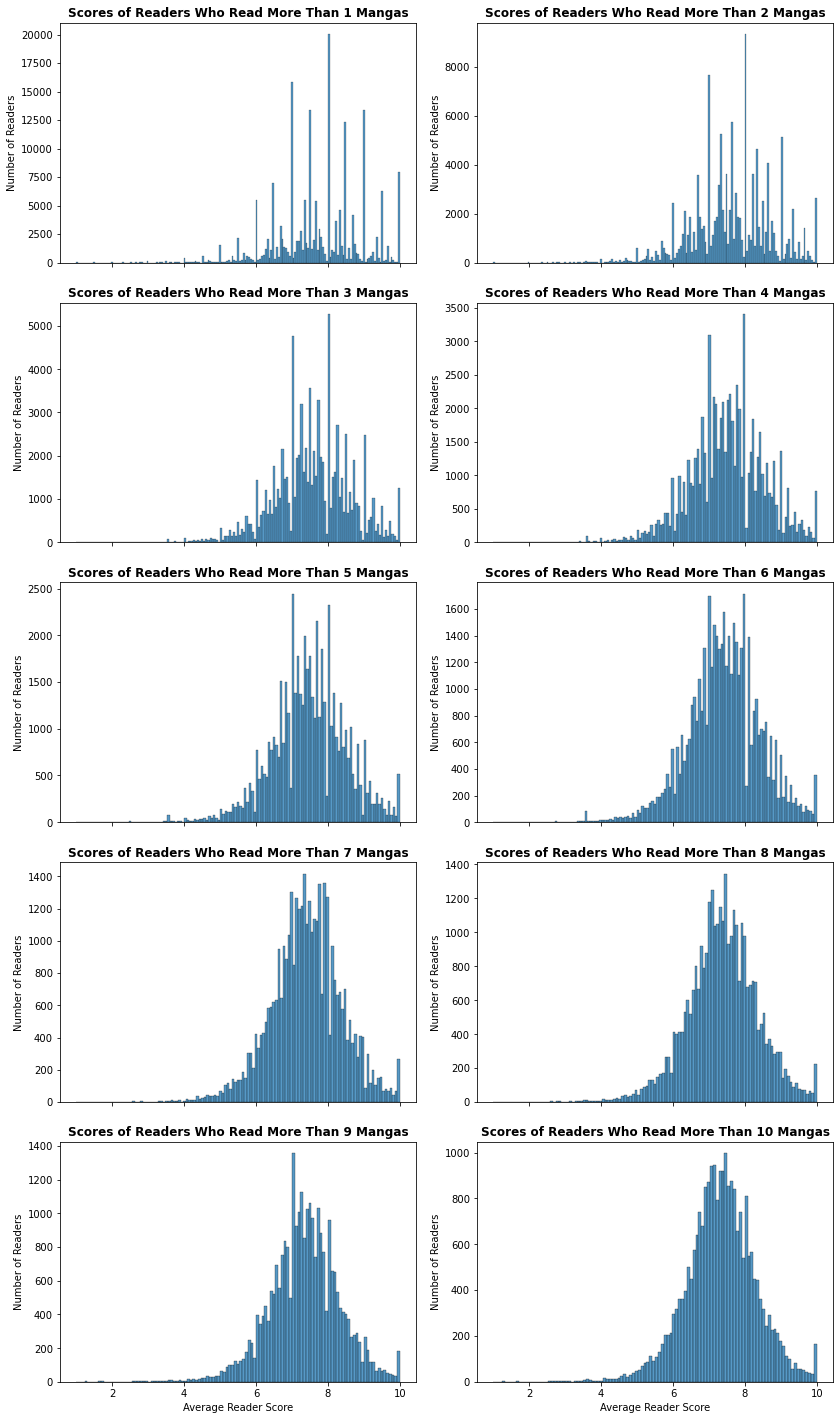

In [219]:
# Plot the average user score distribution for users who read more than i titles
fig, ax = plt.subplots(5,2, figsize=(12,20), sharex=True)
plt.tight_layout(pad=3)
for i in range(1,11):
    sns.histplot(data=temp[temp['no_of_titles'] > i]['average_score'], ax=ax[int((i-1)/2), (i-1)%2])
    ax[int((i-1)/2), (i-1)%2].set_title(f'Scores of Readers Who Read More Than {i} Mangas', fontweight='bold')
    ax[int((i-1)/2), (i-1)%2].set_xlabel('Average Reader Score')
    ax[int((i-1)/2), (i-1)%2].set_ylabel('Number of Readers')

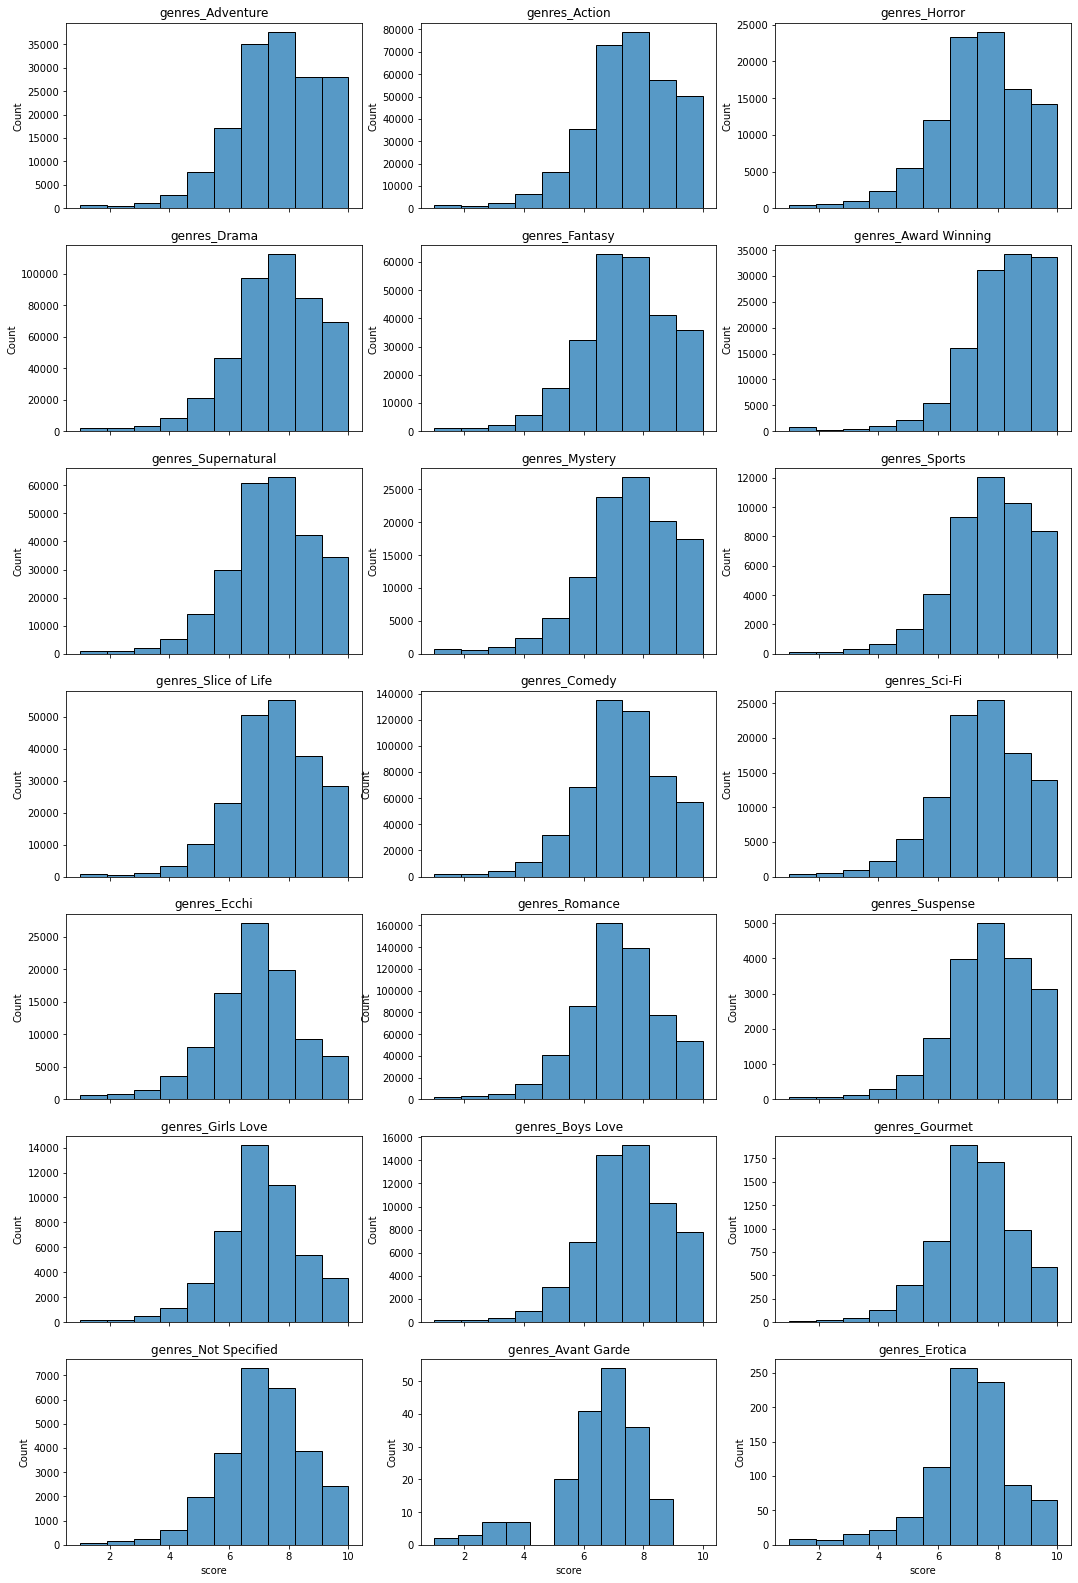

In [220]:
# How many users like specific genres and their ratings for them
# Avant Garde has the lowest score while award winning has the highest average score
# but the most read is romance followed by comedy and drama
genres_list = [col for col in data_merge.columns if 'genres' in col]
col = 3
row = math.ceil(len(genres_list)/3)
subplot_height = 4
subplot_width = 6

fig, ax = plt.subplots(row, col, figsize=(col*subplot_width, row*subplot_height), sharex=True, squeeze=False)
for i, genre in enumerate(genres_list):
    sns.histplot(x=data_merge[data_merge[genre]==1]['score'], bins=10, ax=ax[int(i/col), i%3])
    ax[int(i/col), i%3].set_title(genre)

Text(0.5, 0.98, 'Average Score and Number of Submission Per Genre')

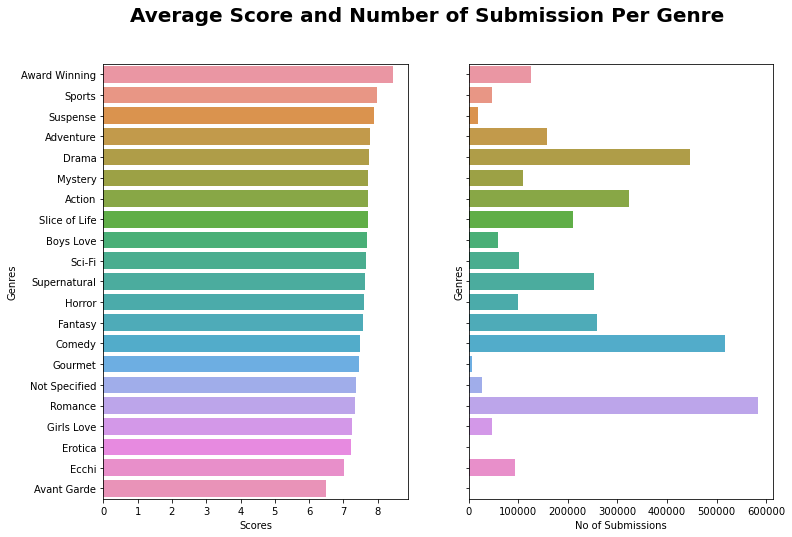

In [221]:
# Average score for each genre
chart = {'genres': [], 'scores': [], 'count': []}
for i, genre in enumerate(genres_list):
    chart['genres'].append(genre.replace('genres_', ""))
    chart['scores'].append(data_merge[data_merge[genre]==1]['score'].mean())
    chart['count'].append(data_merge[data_merge[genre]==1]['score'].count())

temp = pd.DataFrame.from_dict(chart)
temp.sort_values('scores', ascending=False, inplace=True)
fig, ax = plt.subplots(1, 2, figsize=(12,8), sharey=True, facecolor='white')
# Score of Each Genre
sns.barplot(x='scores', y='genres', data=temp, ax=ax[0])
ax[0].set_ylabel('Genres')
ax[0].set_xlabel('Scores')

# No of submission for each genre
sns.barplot(x='count', y='genres', data=temp, ax=ax[1])
ax[1].set_ylabel('Genres')
ax[1].set_xlabel('No of Submissions')
fig.suptitle('Average Score and Number of Submission Per Genre', fontweight='bold', fontsize=20)

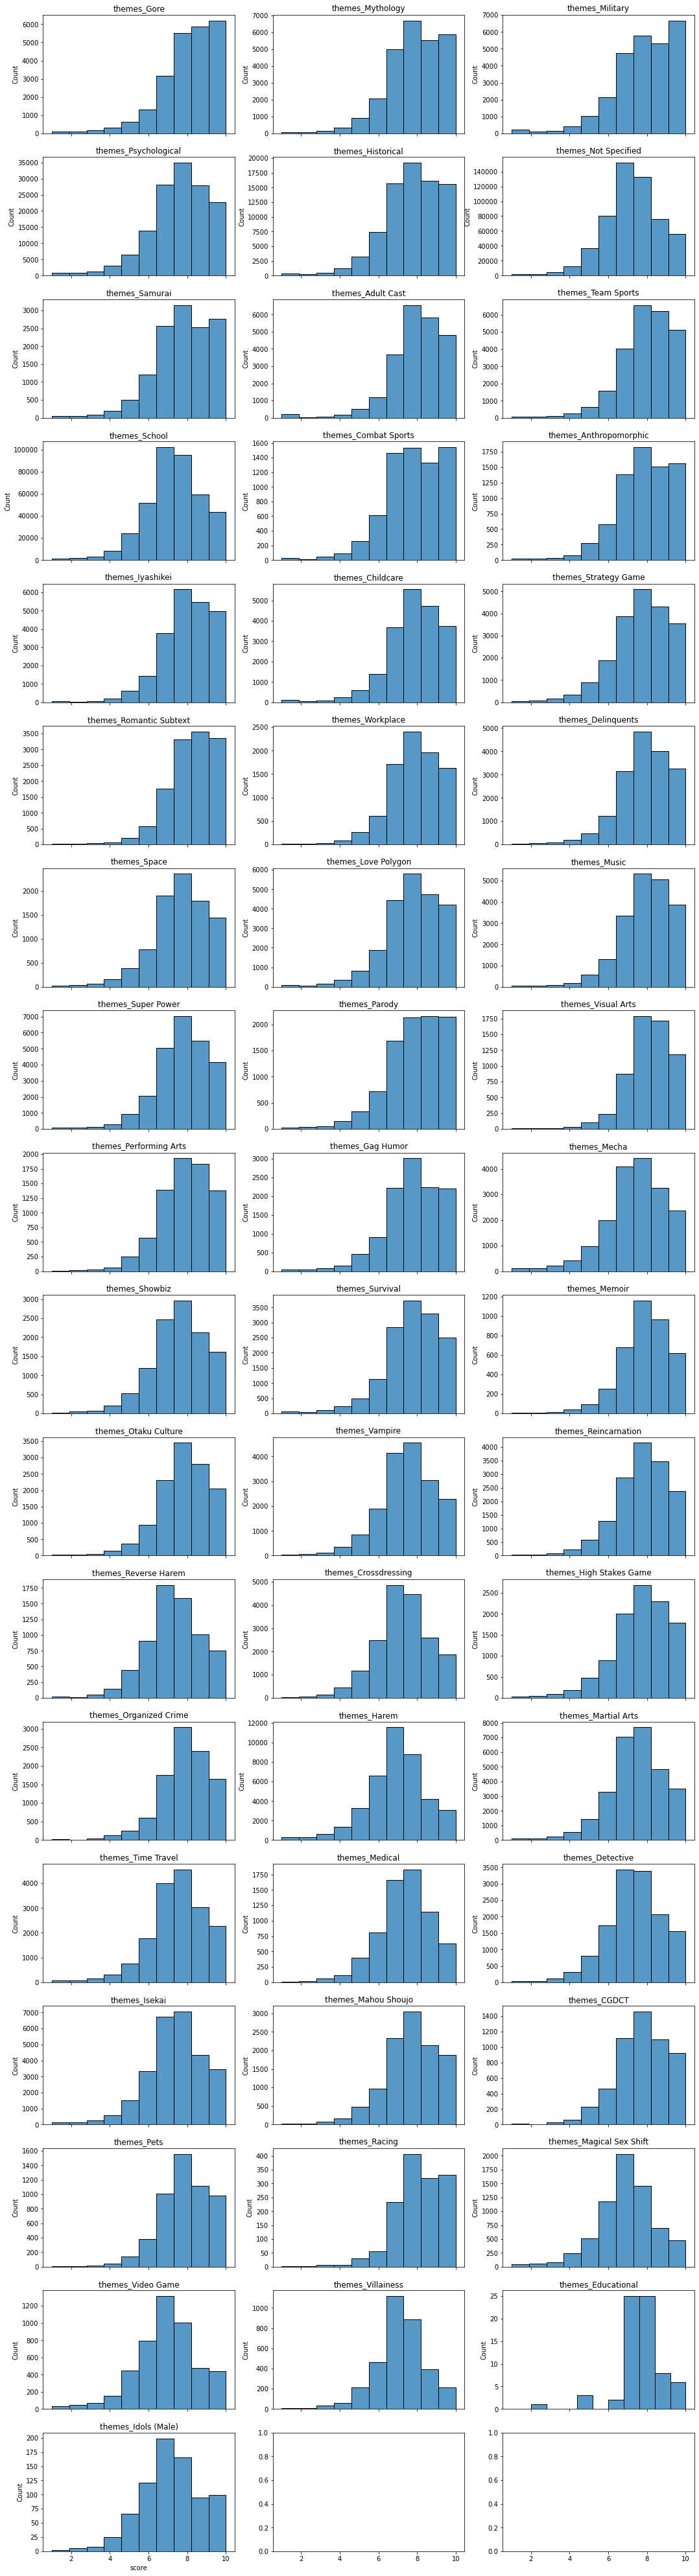

In [222]:
# How many users like specific themes and their rating for them
# Romantic subtext scored the highest and magical sex shift scored the lowest for theme
# Most members who read is Not specified, school and psychological
themes_list = [col for col in data_merge.columns if 'themes' in col]
col = 3
row = math.ceil(len(themes_list)/3)
subplot_height = 4
subplot_width = 6

fig, ax = plt.subplots(row, col, figsize=(col*subplot_width, row*subplot_height), sharex=True, squeeze=False)
for i, theme in enumerate(themes_list):
    sns.histplot(x=data_merge[data_merge[theme]==1]['score'], bins=10, ax=ax[int(i/col), i%3])
    ax[int(i/col), i%3].set_title(theme)

Text(0.5, 0.98, 'Average Score and Number of Submission Per Theme')

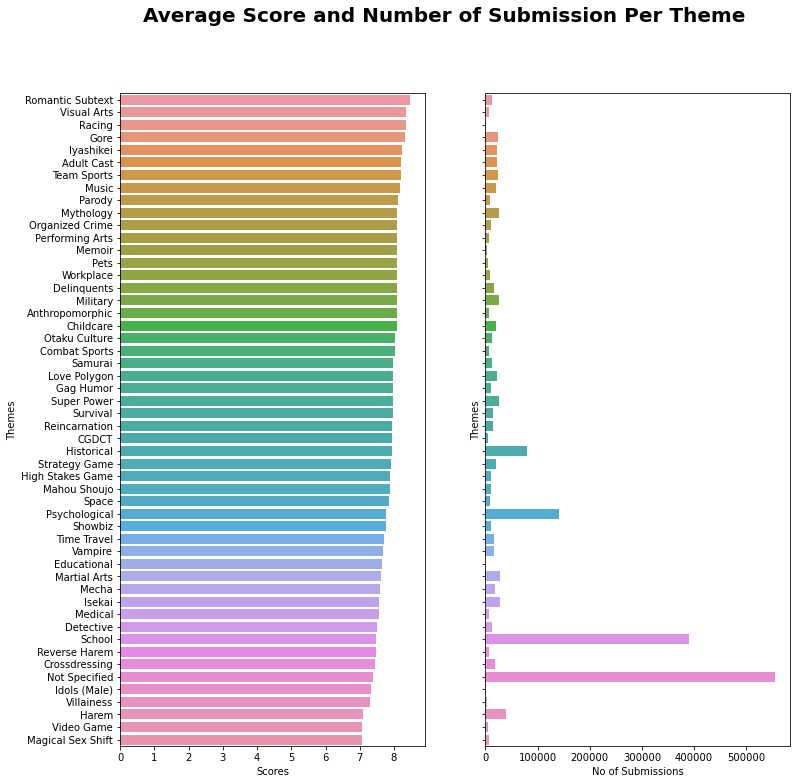

In [223]:
# Average score for each theme
chart = {'themes': [], 'scores': [], 'count': []}
for i, theme in enumerate(themes_list):
    chart['themes'].append(theme.replace('themes_', ""))
    chart['scores'].append(data_merge[data_merge[theme]==1]['score'].mean())
    chart['count'].append(data_merge[data_merge[theme]==1]['score'].count())

temp = pd.DataFrame.from_dict(chart)
temp.sort_values('scores', ascending=False, inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(12,12), sharey=True, facecolor='white')
sns.barplot(x='scores', y='themes', data=temp)

# Score of Each Theme
sns.barplot(x='scores', y='themes', data=temp, ax=ax[0])
ax[0].set_ylabel('Themes')
ax[0].set_xlabel('Scores')

# No of submission for each theme
sns.barplot(x='count', y='themes', data=temp, ax=ax[1])
ax[1].set_ylabel('Themes')
ax[1].set_xlabel('No of Submissions')
fig.suptitle('Average Score and Number of Submission Per Theme', fontweight='bold', fontsize=20)

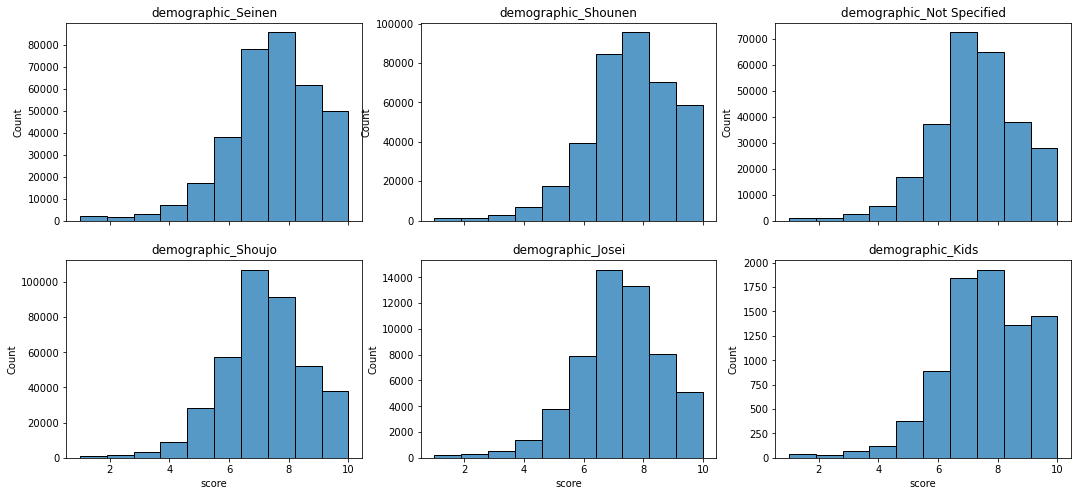

In [224]:
# How many users like specific demographic and their rating for them
demographic_list = [col for col in data_merge.columns if 'demographic' in col]
col = 3
row = math.ceil(len(demographic_list)/3)
subplot_height = 4
subplot_width = 6

fig, ax = plt.subplots(row, col, figsize=(col*subplot_width, row*subplot_height), sharex=True, squeeze=False)
for i, demographic in enumerate(demographic_list):
    sns.histplot(x=data_merge[data_merge[demographic]==1]['score'], bins=10, ax=ax[int(i/col), i%3])
    ax[int(i/col), i%3].set_title(demographic)

Text(0.5, 0.98, 'Average Score and Number of Submission Per Demographic')

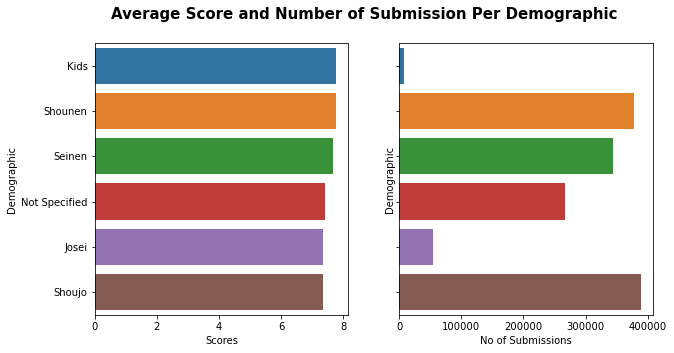

In [225]:
# Average score for each theme
# Surprisingly, mangas targetted at kids has the highest average score but that might be attributed to the relatively lower number of submissions
chart = {'demographic': [], 'scores': [], 'count': []}
for i, demographic in enumerate(demographic_list):
    chart['demographic'].append(demographic.replace('demographic_', ""))
    chart['scores'].append(data_merge[data_merge[demographic]==1]['score'].mean())
    chart['count'].append(data_merge[data_merge[demographic]==1]['score'].count())

temp = pd.DataFrame.from_dict(chart)
temp.sort_values('scores', ascending=False, inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True, facecolor='white')
sns.barplot(x='scores', y='demographic', data=temp)

# Score of Each Theme
sns.barplot(x='scores', y='demographic', data=temp, ax=ax[0])
ax[0].set_ylabel('Demographic')
ax[0].set_xlabel('Scores')

# No of submission for each theme
sns.barplot(x='count', y='demographic', data=temp, ax=ax[1])
ax[1].set_ylabel('Demographic')
ax[1].set_xlabel('No of Submissions')
fig.suptitle('Average Score and Number of Submission Per Demographic', fontweight='bold', fontsize=15)

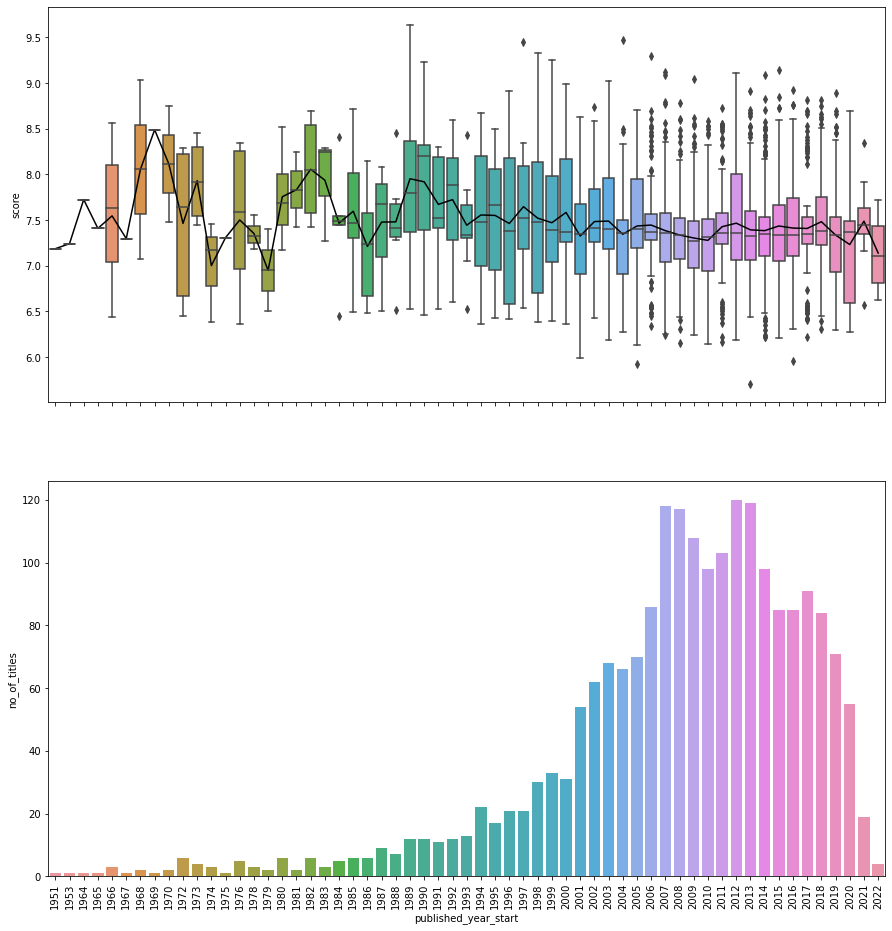

In [226]:
# Average manga scores has been declining since 1988
fig, ax = plt.subplots(2, 1, figsize=(15,16), sharex=True)
temp = data_merge[data_merge['published_year_start']!='Not available']
temp = temp.groupby(['index', 'manga_title', 'published_year_start'])['score'].mean()
temp = temp.reset_index().sort_values(by='published_year_start')
sns.lineplot(x='published_year_start', y='score', data=temp, ci=None, color='black', ax=ax[0])
sns.boxplot(x='published_year_start', y='score', data=temp, ax=ax[0])

# Counts of Titles
temp = temp['published_year_start'].value_counts().sort_index().reset_index()
temp.rename(columns={'index': 'published_year_start', 'published_year_start': 'no_of_titles'}, inplace=True)
sns.barplot(x='published_year_start', y='no_of_titles', data=temp, ax=ax[1], ci=None)
ax[1].tick_params(axis='x', labelrotation=90);

### Feature Engineering

#### Classifying manga by their length

In [227]:
# There is no industrial standard defining how many chapters equal to 1 vol as the number of pages per chapters can vary as well
# Hence the groupings are based on rough cut off for each group
data_merge['vol_groups'] = data_merge['last_vol'].apply(lambda x: 0 if x <= 10 else (1 if x <= 20 else (2 if x <=40 else 3)))
data_merge['chpt_groups'] = data_merge['last_chpt'].apply(lambda x: 0 if x <= 80 else (1 if x <= 160 else (2 if x <=320 else 3)))
data_merge['manga_length'] = data_merge[['vol_groups', 'chpt_groups']].max(axis=1).astype(str)
data_merge.drop(columns = ['vol_groups', 'chpt_groups'], inplace=True)

#### Applying clustering on data

In [228]:
data_clustering = data_merge[['genres_Adventure', 'genres_Action', 'genres_Horror',
       'genres_Drama', 'genres_Fantasy', 'genres_Award Winning',
       'genres_Supernatural', 'genres_Mystery', 'genres_Sports',
       'genres_Slice of Life', 'genres_Comedy', 'genres_Sci-Fi',
       'genres_Ecchi', 'genres_Romance', 'genres_Suspense',
       'genres_Girls Love', 'genres_Boys Love', 'genres_Gourmet',
       'genres_Not Specified', 'genres_Avant Garde', 'genres_Erotica', 'read_status',
        'published_decade_start', 'manga_length']]

In [229]:
data_clustering_ohe = pd.get_dummies(data_clustering)

# Standard Scale Data
sc = StandardScaler()
data_clustering_ohe_sc = sc.fit_transform(data_clustering_ohe)

10
15
20
25
30
35
40
45


<AxesSubplot:xlabel='k', ylabel='inertia'>

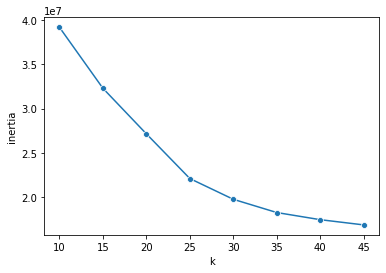

In [230]:
# Determining the best k value for K-Means Clustering
scores = []
for k in range(10, 50, 5):
    print(k)
    km_k = KMeans(n_clusters=k)
    km_k.fit(data_clustering_ohe_sc)
    inertia = km_k.inertia_
    scores.append([k, inertia])
    
# Plot inertia vs k
scores_df = pd.DataFrame(scores)
scores_df.columns = ['k', 'inertia']
sns.lineplot(x='k', y='inertia', data=scores_df, marker='o')

In [231]:
# Since the inertia stopped decreasing rapidly at around k=40, we will use k=30 for the clustering
km_k = KMeans(n_clusters=30)
km_k.fit(data_clustering_ohe_sc)

KMeans(n_clusters=30)

In [232]:
data_merge['clusters'] = km_k.labels_

In [233]:
# Checking how does genres varies for each clusters
genres_list = [col for col in manga_details.columns if 'genres' in col]
temp = manga_details[manga_details['index'].isin(data_merge['index'].unique())]
temp = temp[genres_list].sum().reset_index()
temp.rename(columns={'index': 'genres', 0:'counts'}, inplace=True)
temp['genres'] = temp['genres'].apply(lambda x: x.replace('genres_', ''))
temp.sort_values('counts', ascending=False, inplace=True)

In [ ]:
# Save merged data to file
data_merge.to_csv("../data_cleaned/data_merged.csv", index=False)